In [1]:
#pip install shap

In [1]:
import time 
import shap 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Final Data\Urad\Urad_Karnataka.csv")
df = df.drop(columns=['latitude','longitude','DistrictName', 'year'])
# df = df.sample(frac=1).reset_index(drop=True)
#df = df.drop(columns=['DistrictName','latitude','longitude','year','year_mask'])

In [3]:
# cat_cols = ['DistrictName', 'year']
# # Label encode categorical columns
# encoder = LabelEncoder()
# df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [4]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl2_7', 'stl2_8', 'stl2_9',
       'stl2_10', 'stl3_7', 'stl3_8', 'stl3_9', 'stl3_10', 'stl4_7', 'stl4_8',
       'stl4_9', 'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10',
       'swvl2_7', 'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl3_7', 'swvl3_8',
       'swvl3_9', 'swvl3_10', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'swvl4_10',
       'ssr_7', 'ssr_8', 'ssr_9', 'ssr_10', 'u10_7', 'u10_8', 'u10_9',
       'u10_10', 'v10_7', 'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8',
       'tmax_9', 'tmax_10', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7',
       'rain_8', 'rain_9', 'rain_10', 'countrain_7', 'countrain_8',
       'countrain_9', 'countrain_10', 'rh_7', 'rh_8', 'rh_9', 'rh_10',
       'Yield(tonnes/hectare)'],
      dtype='object')

In [6]:
df = df.drop(columns=['stl2_7','stl2_8', 'stl2_9', 'stl2_10', 'stl3_7', 'stl3_8', 'stl3_9', 'stl3_10'])

In [7]:
df = df.rename(columns={'Yield(tonnes/hectare)':'Yield(Tonnes/Hectare)'},inplace=False)
df = df.dropna(subset=['Yield(Tonnes/Hectare)'])

In [8]:
Q1 = df['Yield(Tonnes/Hectare)'].quantile(0.25)
Q3 = df['Yield(Tonnes/Hectare)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Yield_no_outliers'] = np.where((df['Yield(Tonnes/Hectare)'] < lower_bound) | (df['Yield(Tonnes/Hectare)'] > upper_bound), np.nan, df['Yield(Tonnes/Hectare)'])

num_points_after_handling_outliers = df['Yield_no_outliers'].count()
print("Number of points in the final DataFrame after handling outliers:", num_points_after_handling_outliers)

Number of points in the final DataFrame after handling outliers: 432


In [9]:
df = df.dropna(subset=['Yield_no_outliers'])
df = df.drop(columns=['Yield(Tonnes/Hectare)'])

In [10]:
df.rename(columns={'Yield_no_outliers': 'Yield(Tonnes/Hectare)'}, inplace=True)

In [11]:
# for i in range(1, 5):
#     df[f'stl{i}'] = df[[f'stl{i}_{j}' for j in range(1, 5)] + [f'stl{i}_{j}' for j in [11, 12]]].mean(axis=1)

# for i in range(1, 5):
#     df[f'swvl{i}'] = df[[f'swvl{i}_{j}' for j in range(1, 5)] + [f'swvl{i}_{j}' for j in [11, 12]]].mean(axis=1)

# df['u10'] = (df['u10_1'] + df['u10_2'] + df['u10_3'] + df['u10_4'] +df['u10_11'] + df['u10_12'])/6
# df['v10'] = (df['v10_1'] + df['v10_2'] + df['v10_3'] + df['v10_4'] +df['v10_11'] + df['v10_12'])/6
# df['ssr'] = (df['ssr_1'] + df['ssr_2'] + df['ssr_3'] + df['ssr_4'] +df['ssr_11'] + df['ssr_12'])/6
# df['rh'] = (df['rh_1'] + df['rh_2'] + df['rh_3'] + df['rh_4'] +df['rh_11'] + df['rh_12'])/6

# df['rain'] = (df['rain_1'] + df['rain_2'] + df['rain_3'] + df['rain_4'] +df['rain_11'] + df['rain_12'])/6
# df['tmax'] = (df['tmax_1'] + df['tmax_2'] + df['tmax_3'] + df['tmax_4'] +df['tmax_11'] + df['tmax_12'])/6
# df['tmin'] = (df['tmin_1'] + df['tmin_2'] + df['tmin_3'] + df['tmin_4'] +df['tmin_11'] + df['tmin_12'])/6
# df['countrain'] = df['countrain_1'] + df['countrain_2'] + df['countrain_3'] + df['countrain_4'] + df['countrain_11'] + df['countrain_12']

In [12]:
# columns=['stl1','stl4','swvl1','swvl2','swvl3','swvl4','ssr','rh','u10','v10','rain','tmax','tmin','countrain','year','DistrictName','Yield(Tonnes/Hectare)']
# df = df[columns]

In [13]:
df.shape

(432, 57)

In [14]:
X = df.drop('Yield(Tonnes/Hectare)', axis=1)  # Features
y = df['Yield(Tonnes/Hectare)']  # Target variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [16]:
# import time
# def print_accuracy(f):
#     print(
#         f"Root mean squared test error = {np.sqrt(np.mean((f(X_test) - y_test) ** 2))}"
#     )
#     time.sleep(0.5)  # to let the print get out before any progress bars

# from sklearn.ensemble import RandomForestRegressor
# rforest = RandomForestRegressor(
#     n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0
# )
# rforest.fit(X_train, y_train)
# print_accuracy(rforest.predict)
# y_pred = rforest.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print("mse",mse,"/n","r2",r2)

In [17]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
#model = xgb.XGBRegressor(objective="reg:squarederror")
model = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
model.fit(X,y)

RandomForestRegressor(n_estimators=1000, random_state=0)

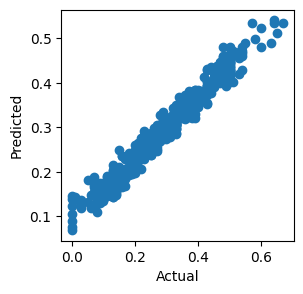

In [18]:
y_pred = model.predict(X)
plt.figure(figsize=(3,3))
plt.scatter(y,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [19]:
import shap

# Assuming 'model' is your trained regression model and 'X' is your feature matrix
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X)


In [20]:
features = X.columns.tolist()

In [21]:
X.shape

(432, 56)

In [22]:
X.head(3)

stl1_7     stl1_8     stl1_9    stl1_10     stl4_7     stl4_8  \
2  23.709196  24.094590  25.560040  23.412315  25.039887  24.625525   
3  24.294176  23.451553  24.040889  23.437735  25.239051  25.019417   
4  23.942125  23.527677  24.793450  23.511671  25.745236  25.181311   

      stl4_9    stl4_10   swvl1_7   swvl1_8  ...    rain_9    rain_10  \
2  24.574990  24.610345  0.258284  0.249051  ...  2.977341  11.068744   
3  24.544540  24.311922  0.229524  0.350556  ...  9.111445   8.904226   
4  24.911198  24.685728  0.280500  0.295511  ...  7.565665   5.788409   

   countrain_7  countrain_8  countrain_9  countrain_10       rh_7       rh_8  \
2            5            7            6            25  76.591713  74.610118   
3            5           23           18            13  71.652933  81.074302   
4            7           10           13            10  76.606217  77.766316   

        rh_9      rh_10  
2  70.154912  85.710644  
3  81.117259  74.728520  
4  75.658348  80.224693  

[3 rows x 56 columns]

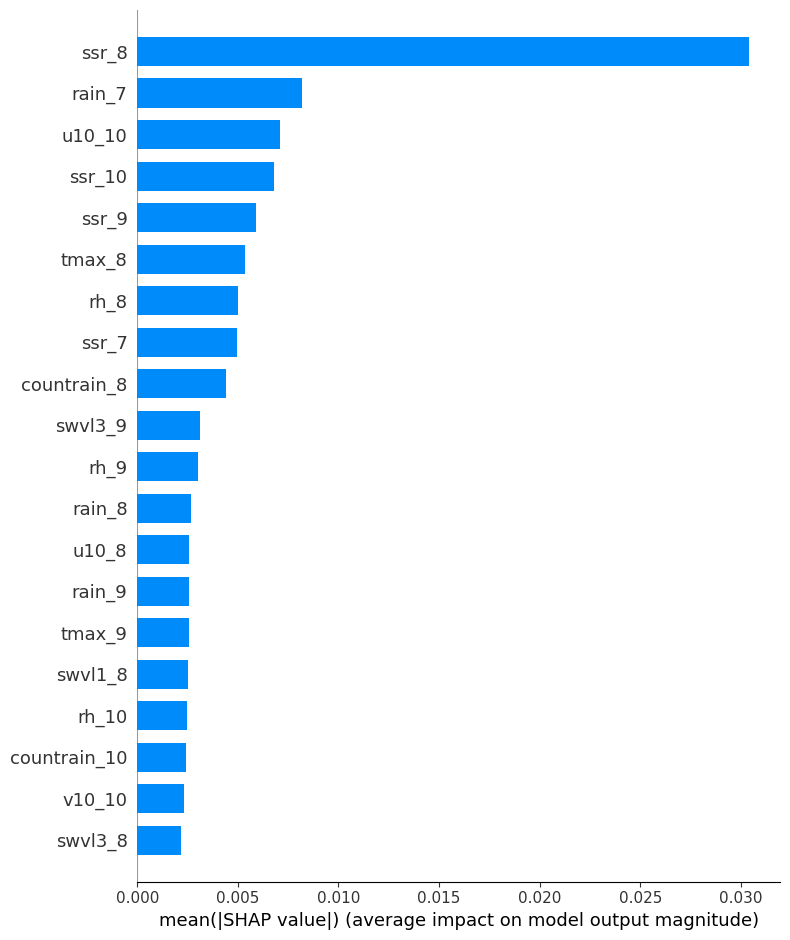

In [23]:
shap.summary_plot(shap_values, X_train, feature_names=features, plot_type="bar")

In [24]:
# for idx in range(50):  # Loop through indexes from 0 to 49
#     shap.dependence_plot(idx, shap_values, X, feature_names=features)

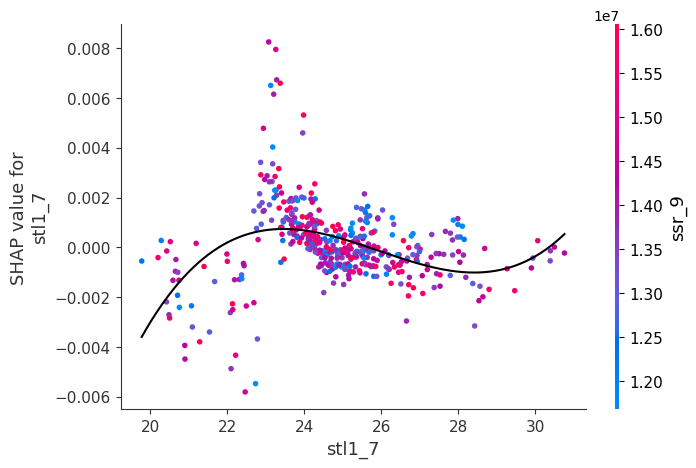

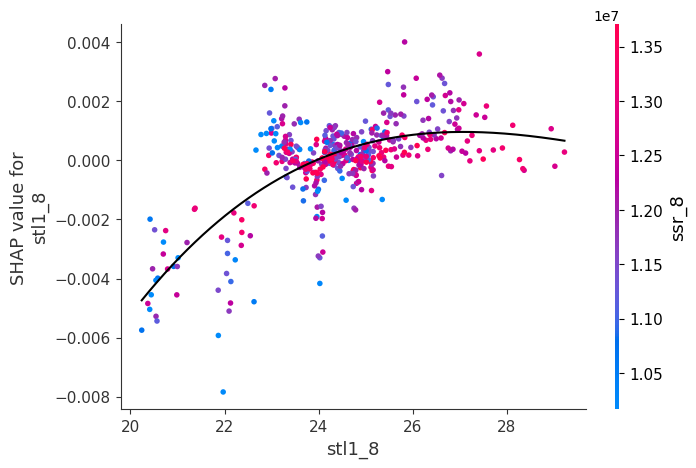

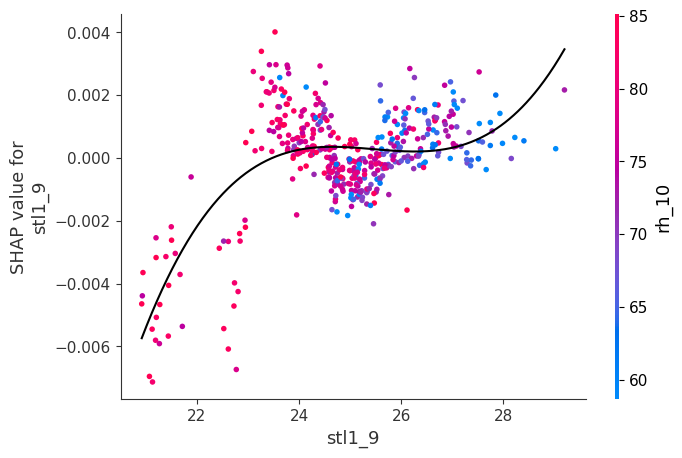

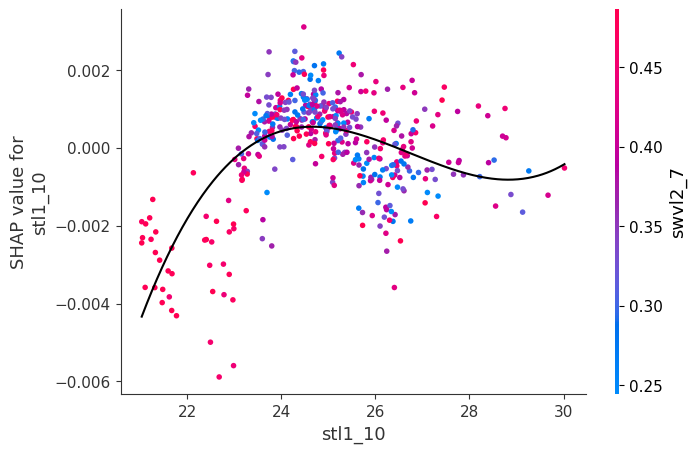

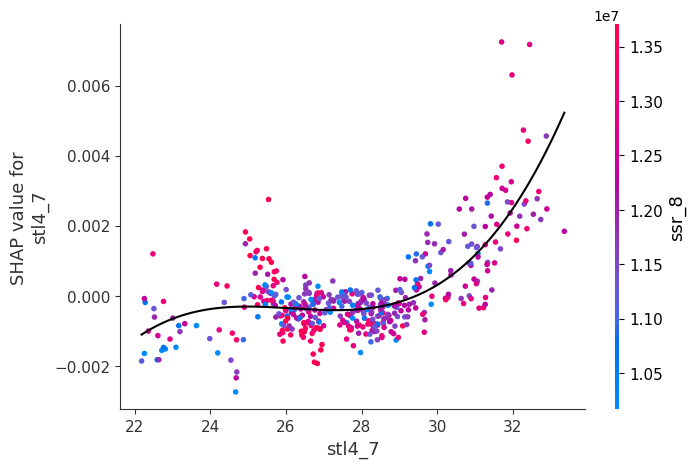

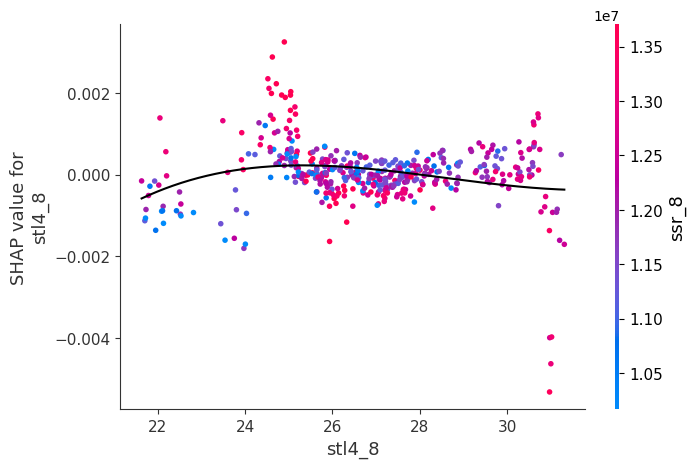

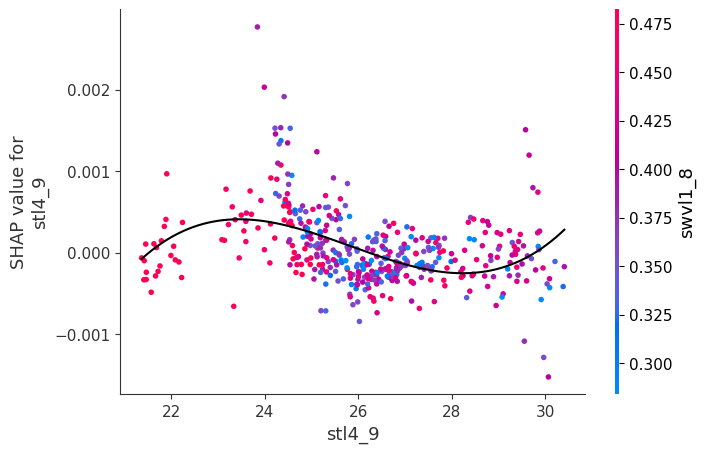

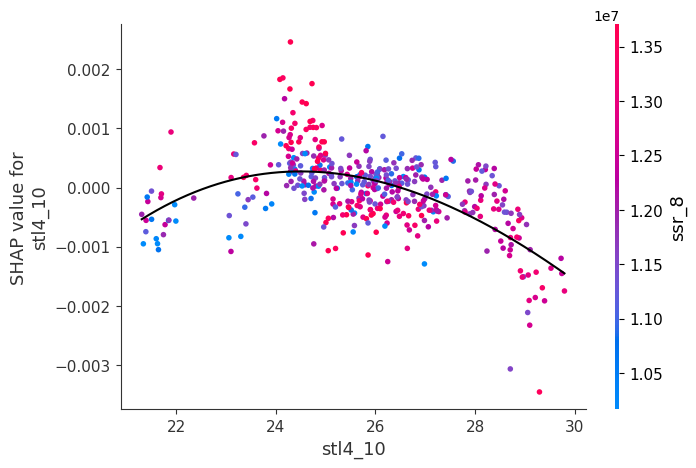

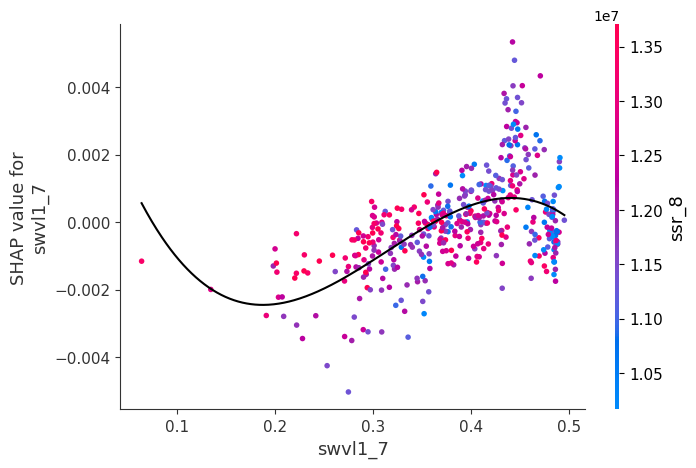

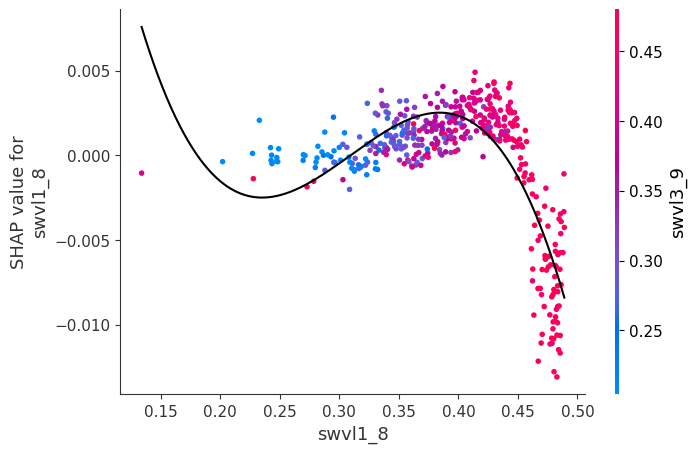

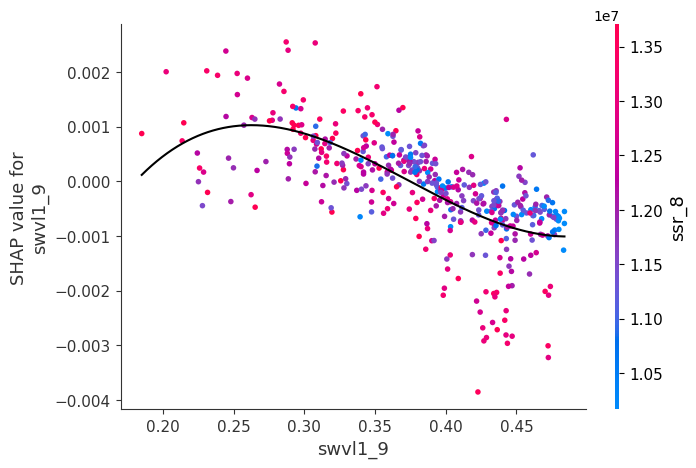

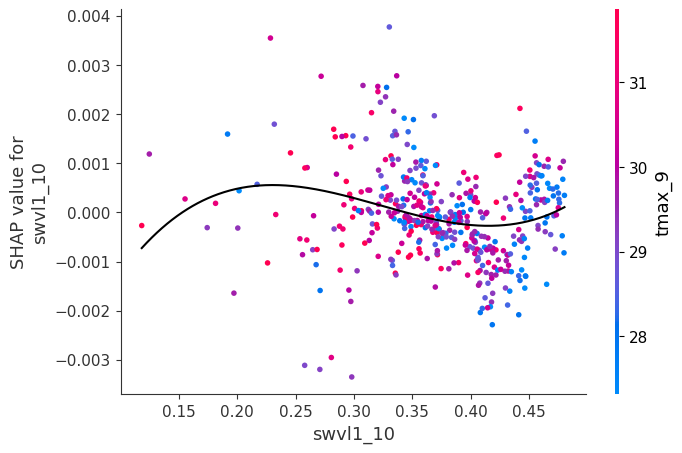

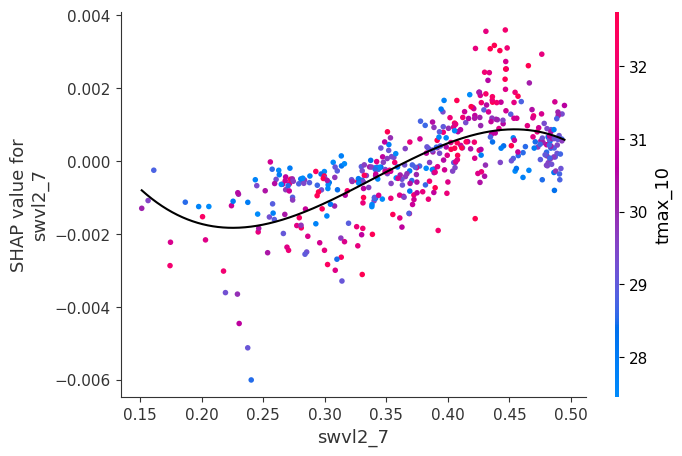

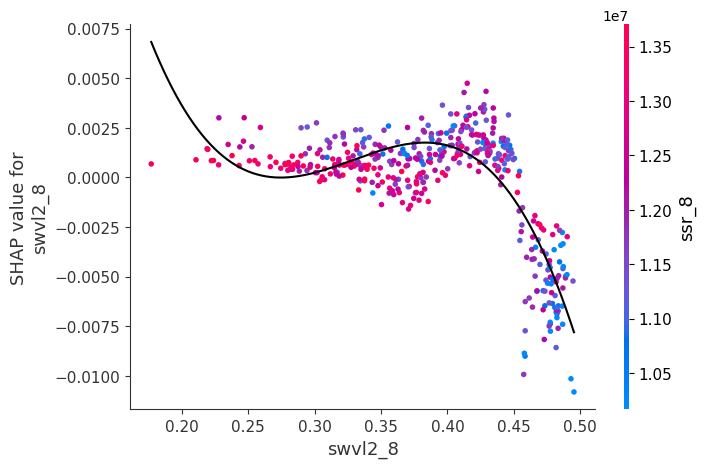

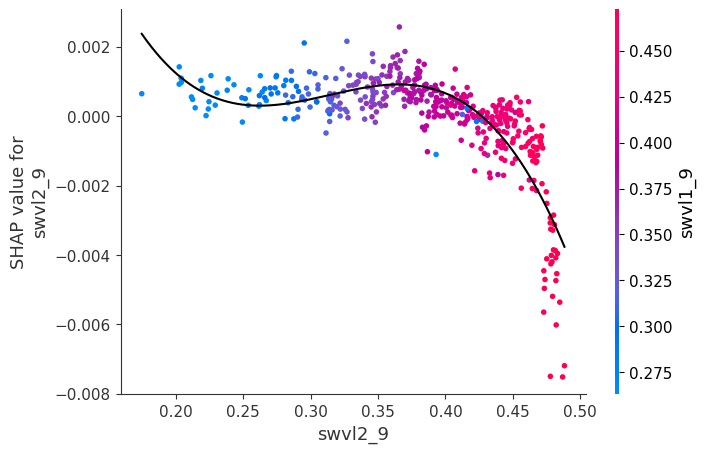

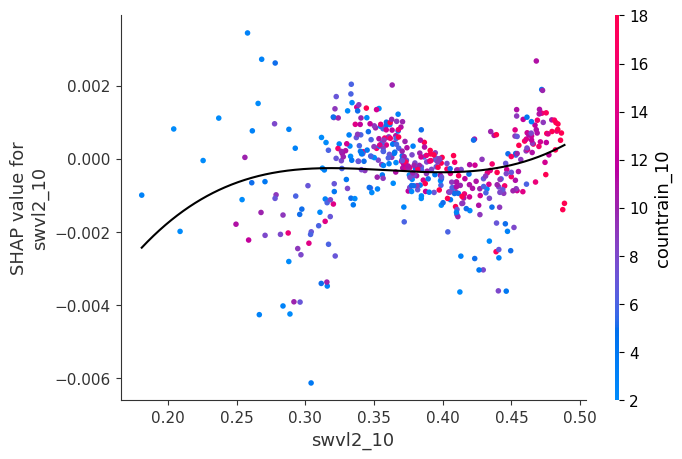

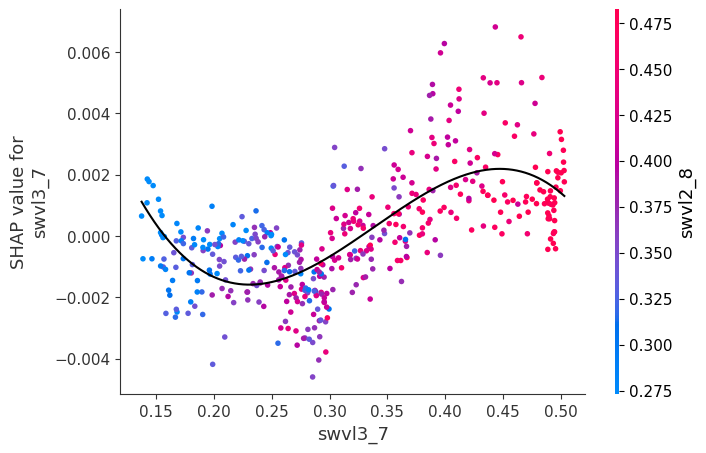

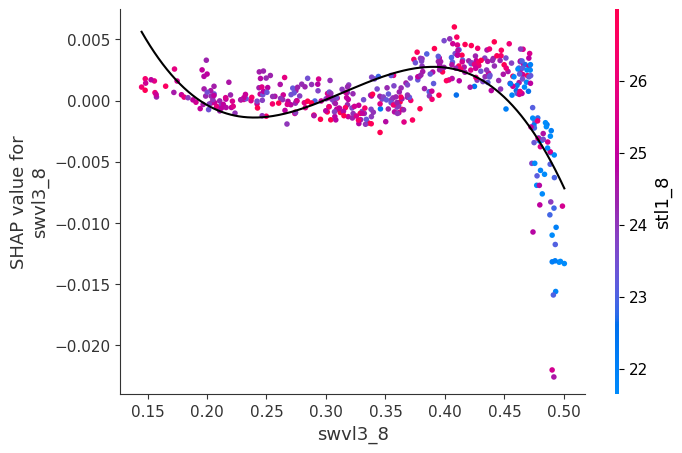

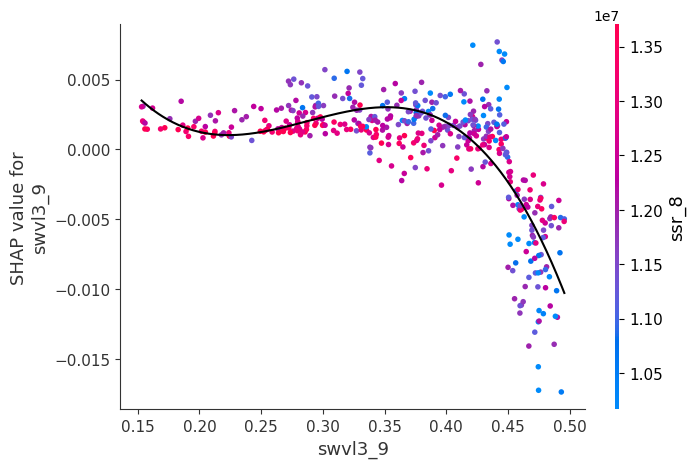

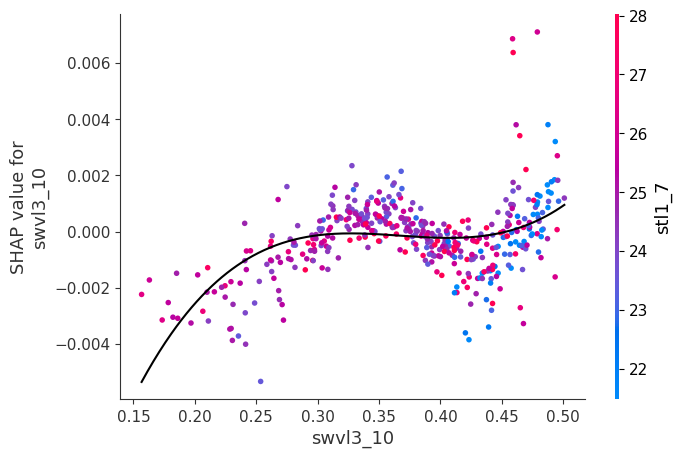

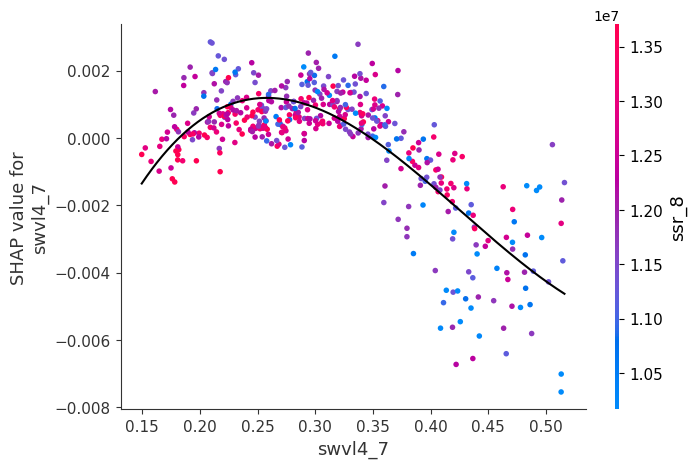

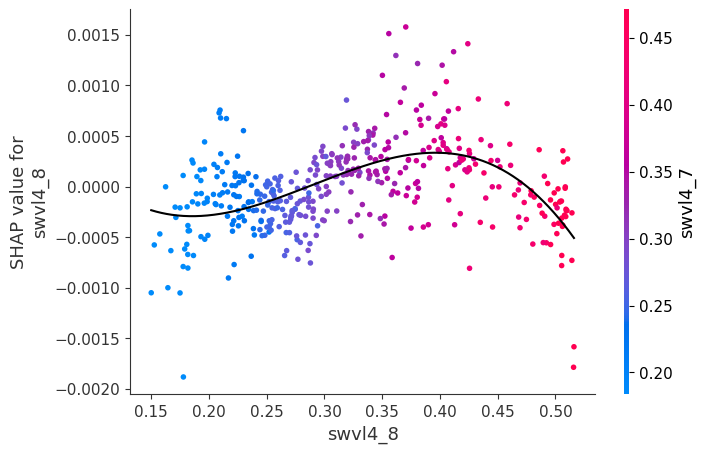

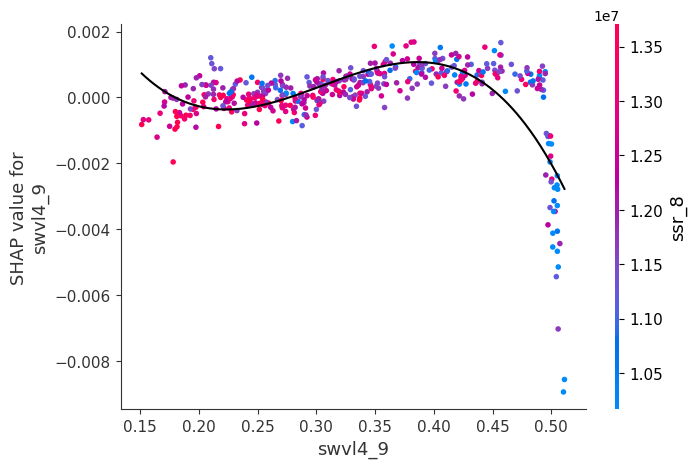

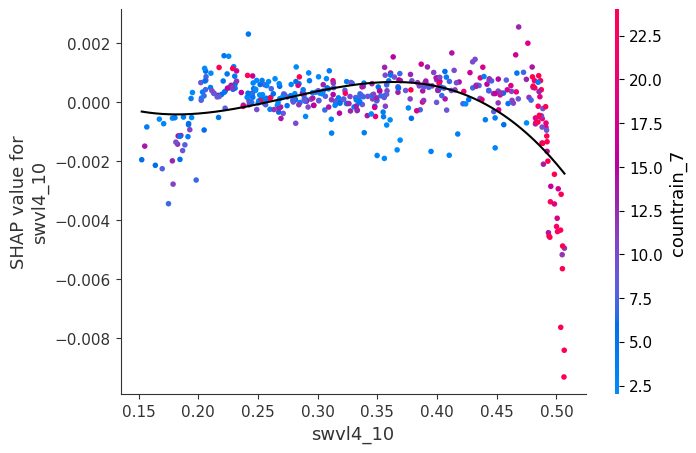

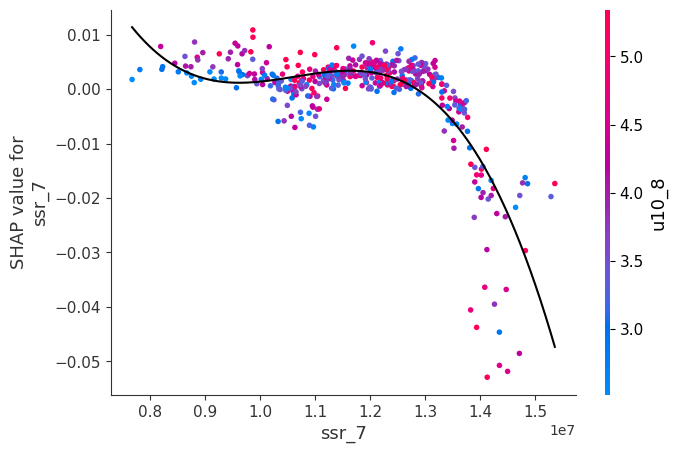

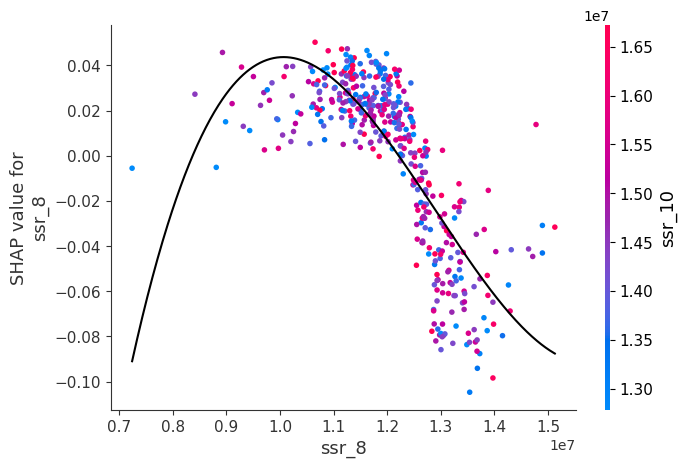

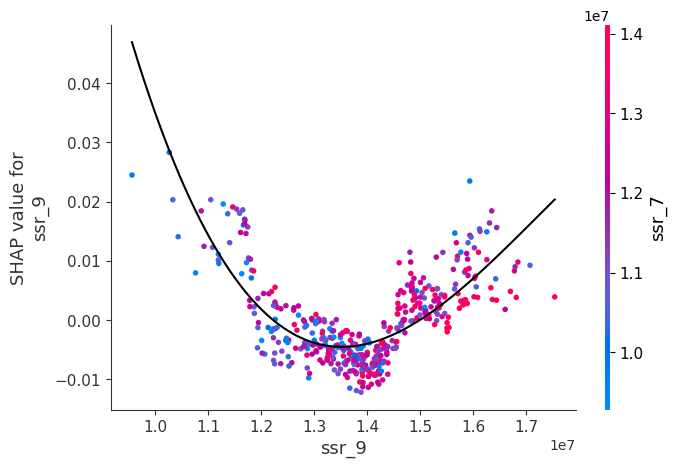

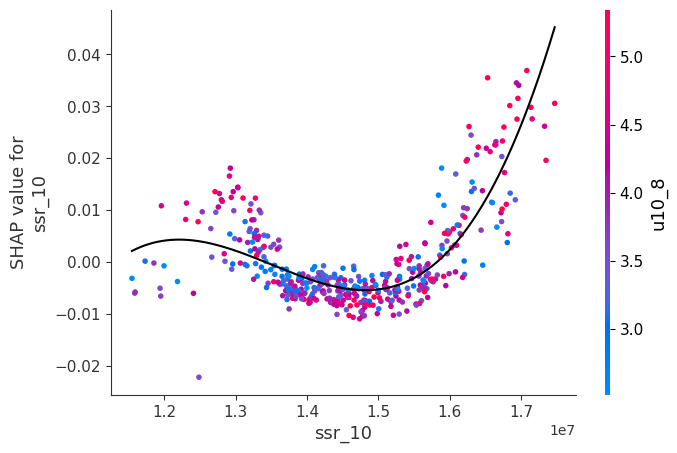

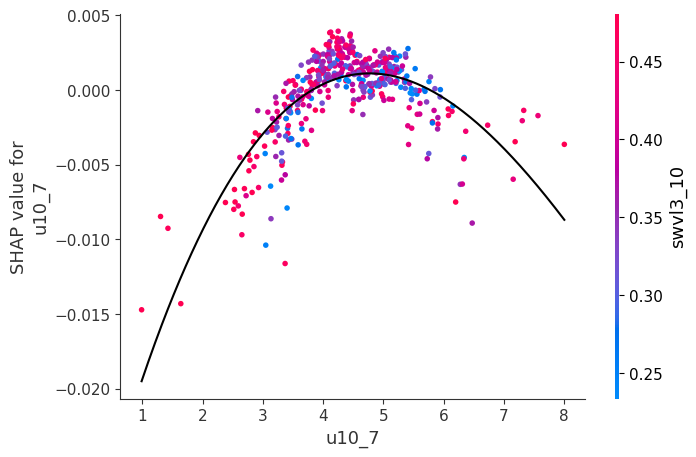

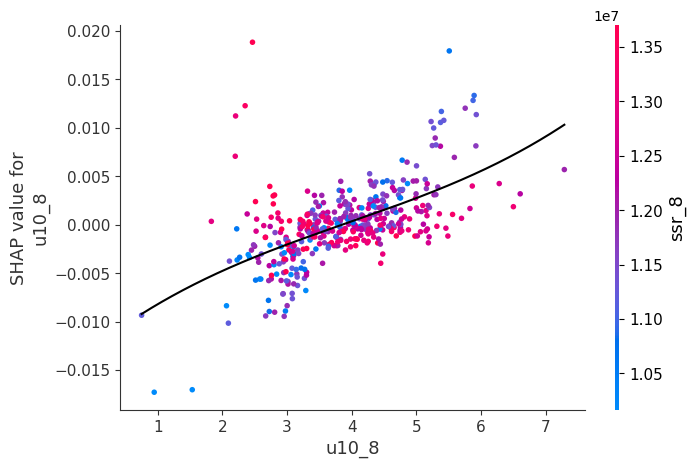

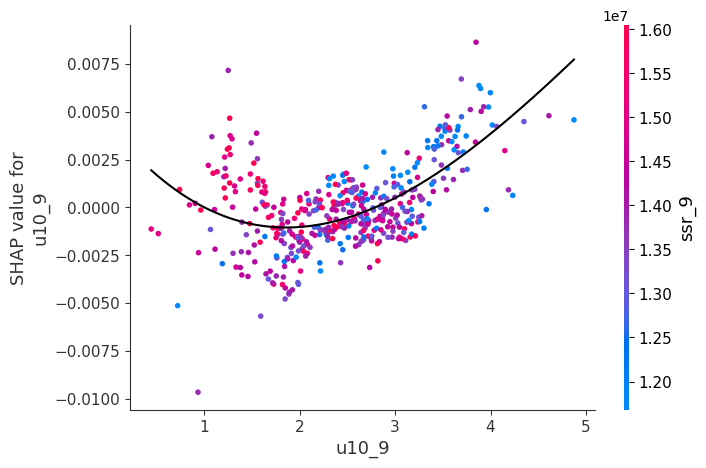

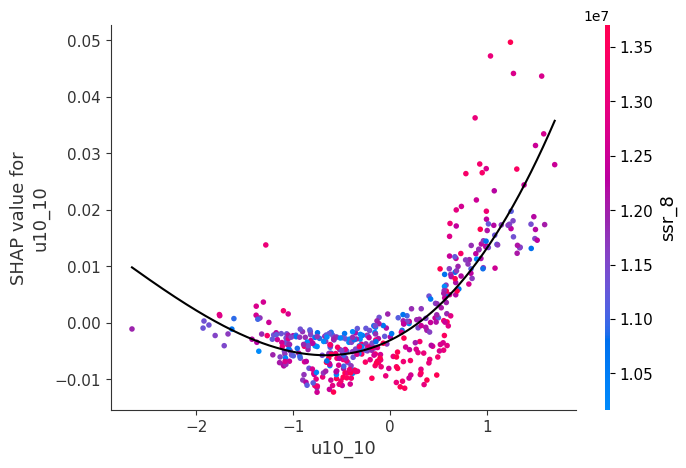

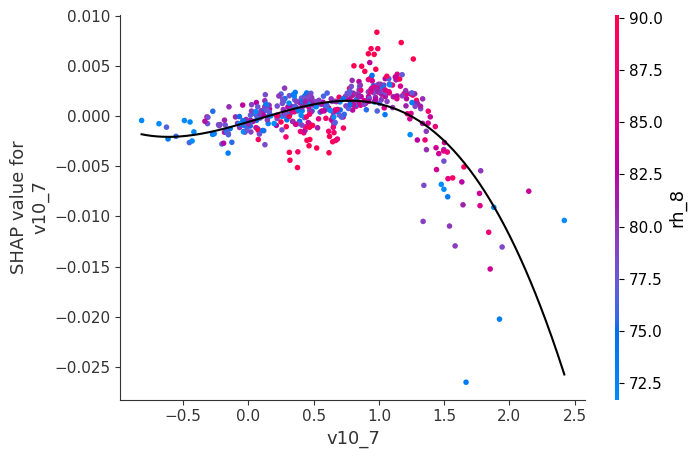

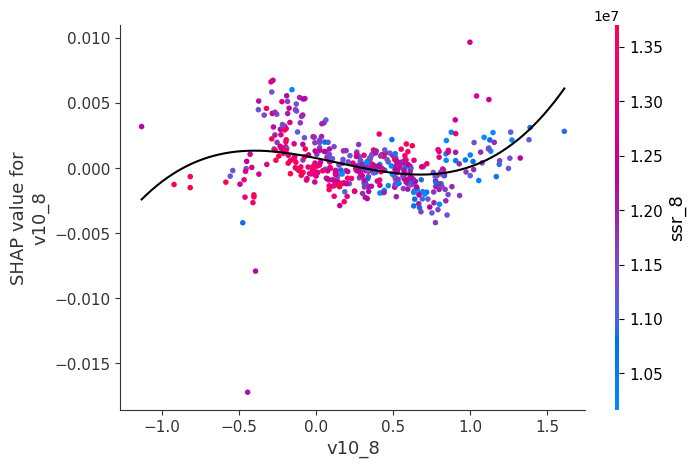

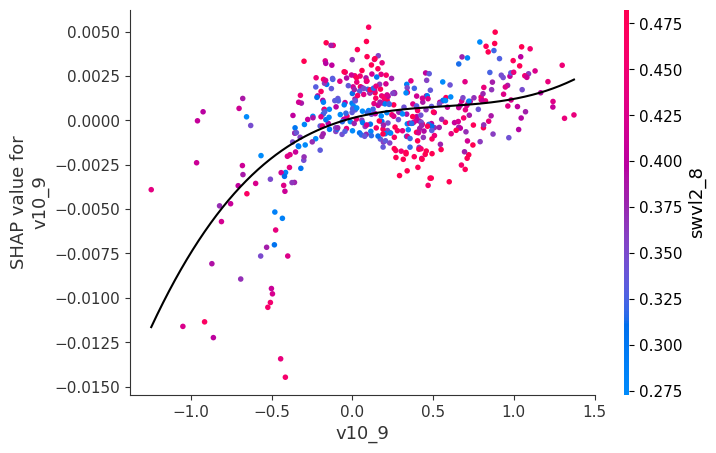

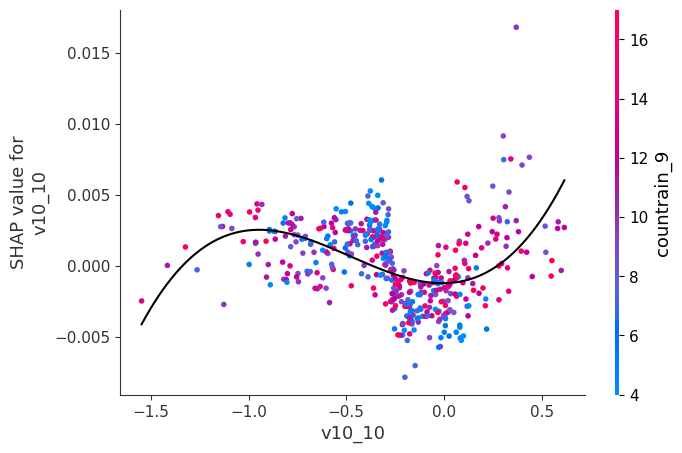

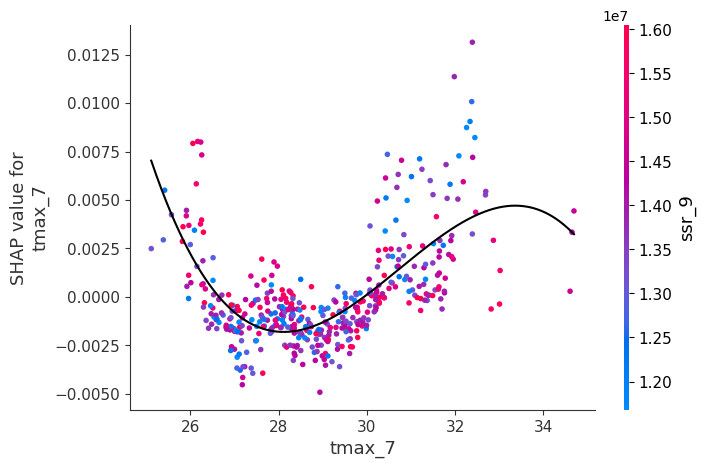

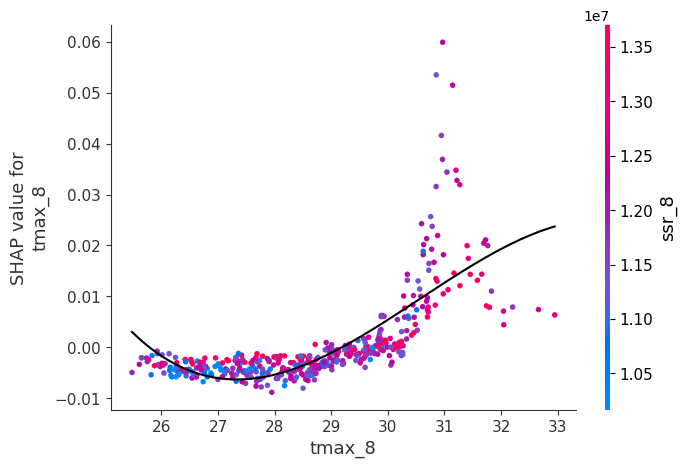

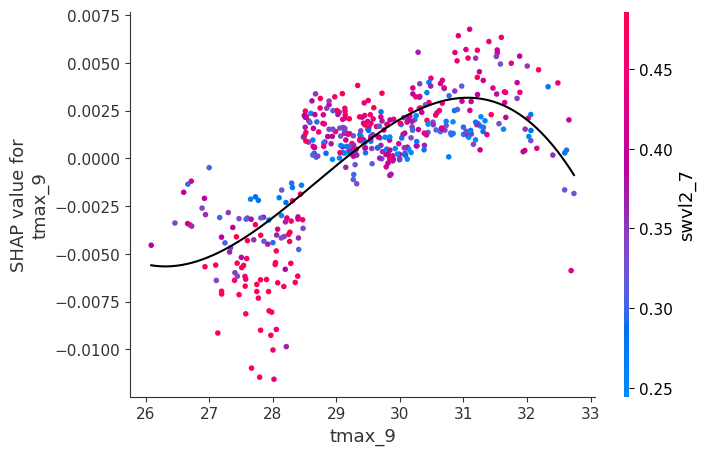

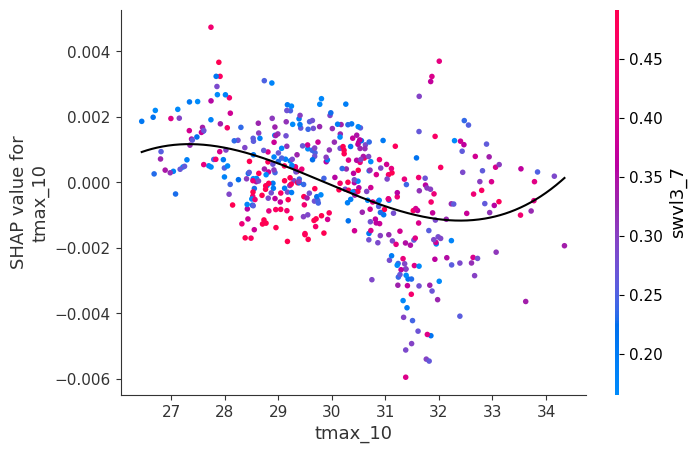

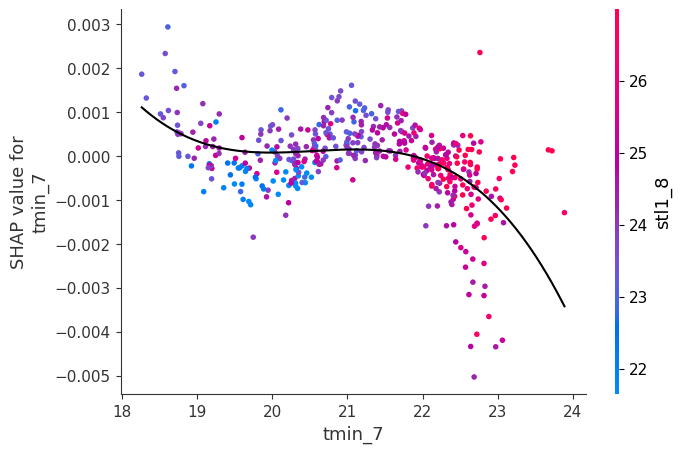

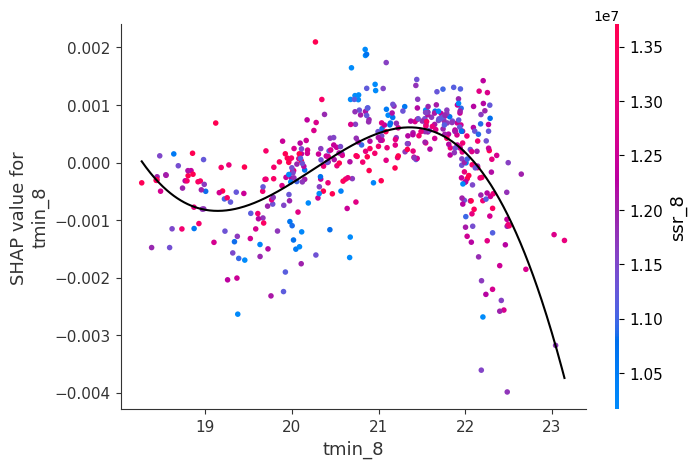

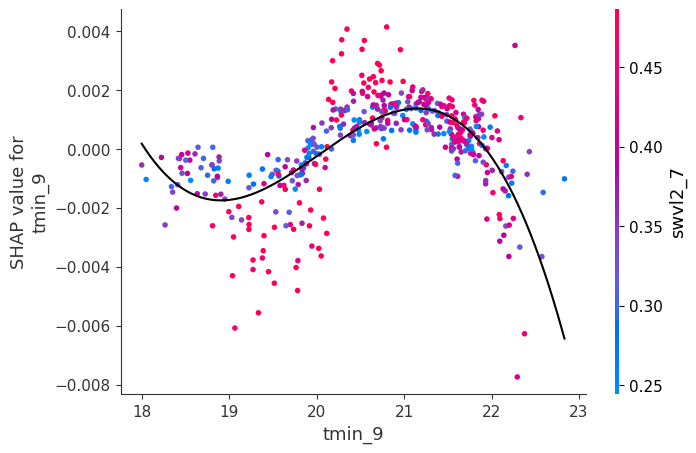

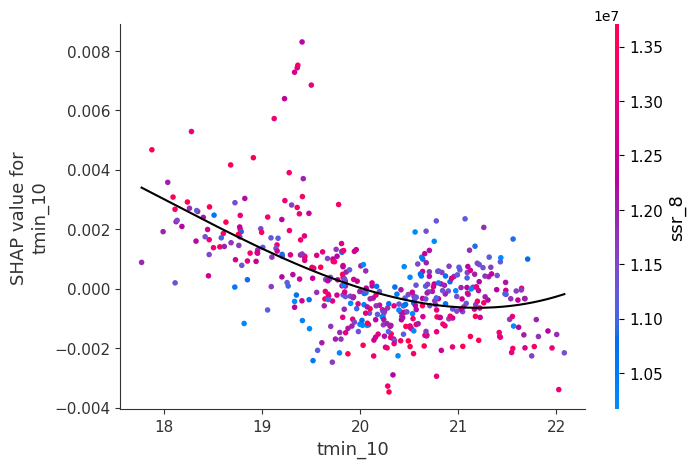

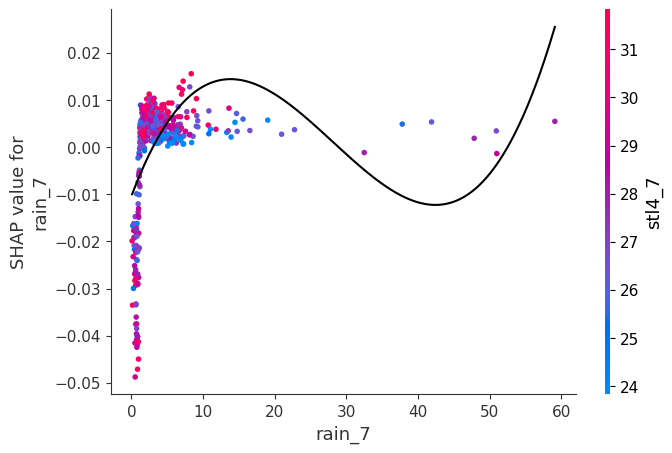

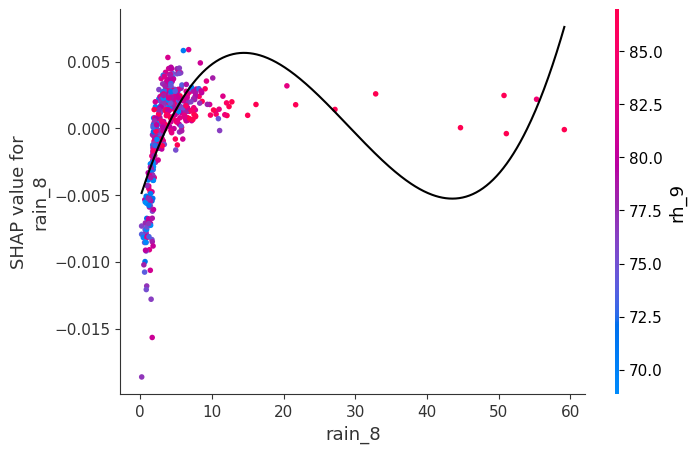

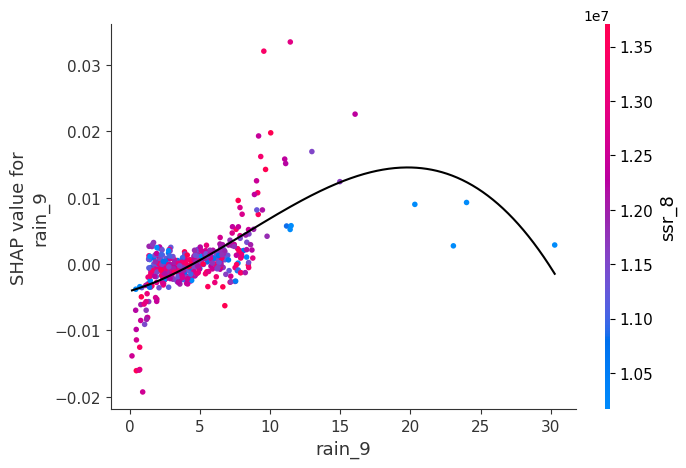

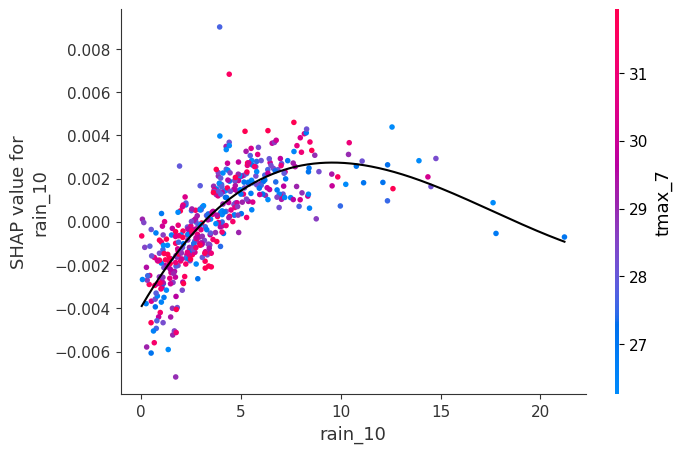

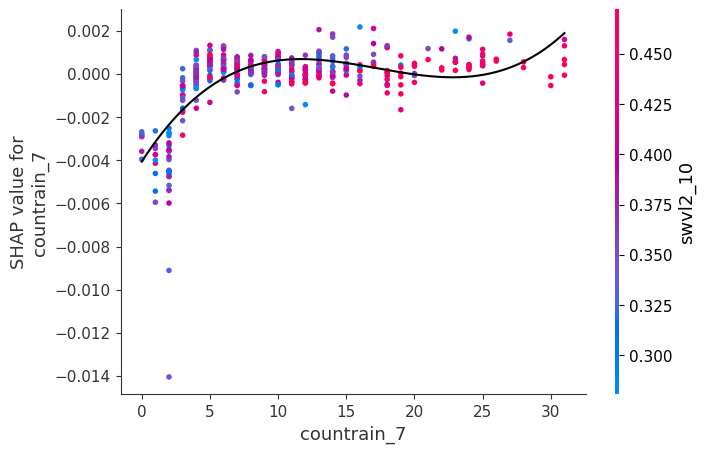

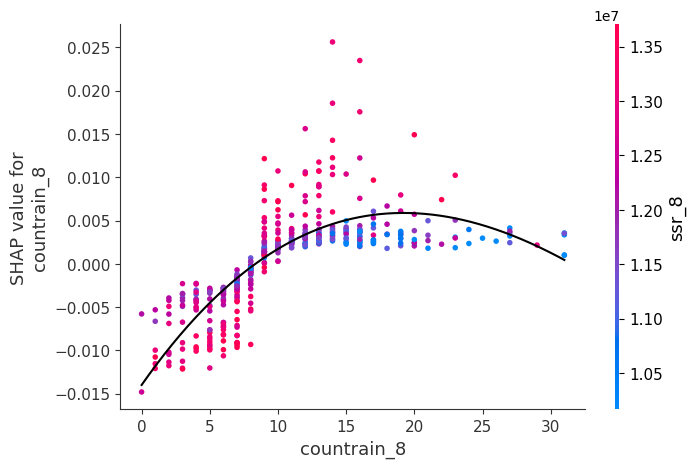

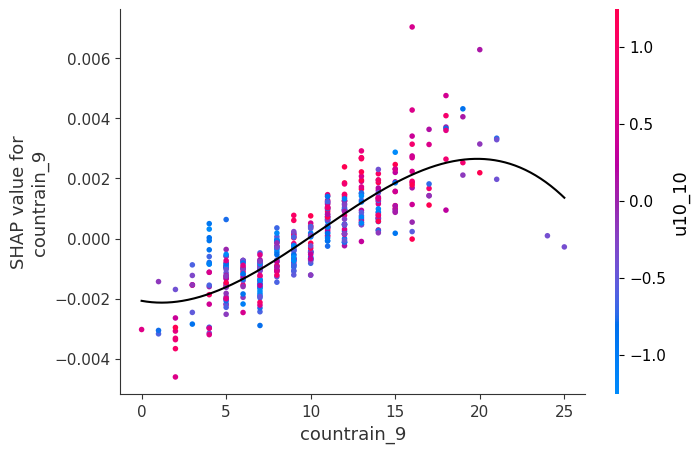

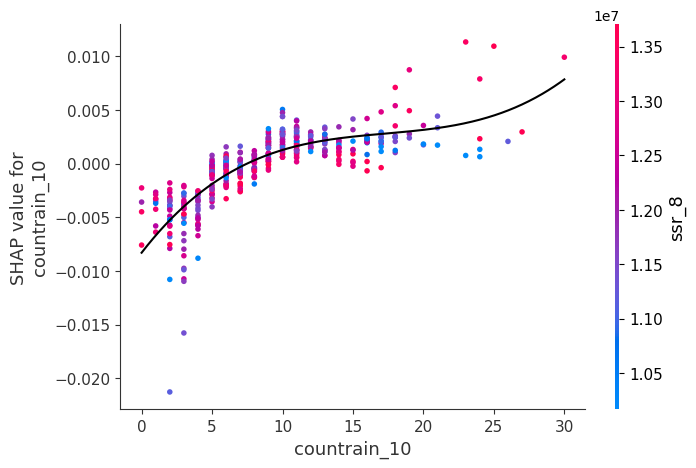

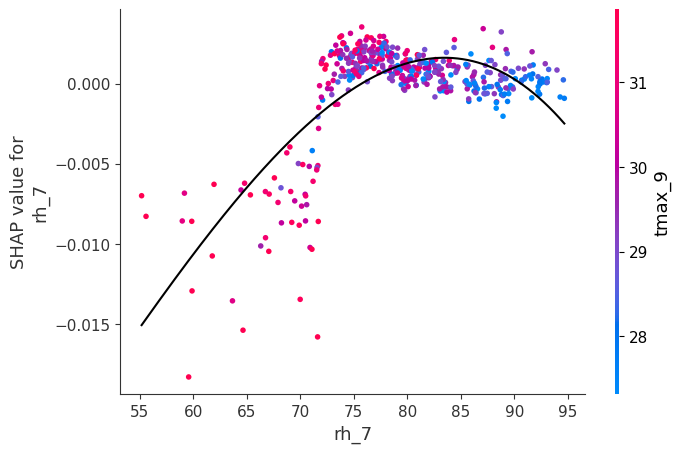

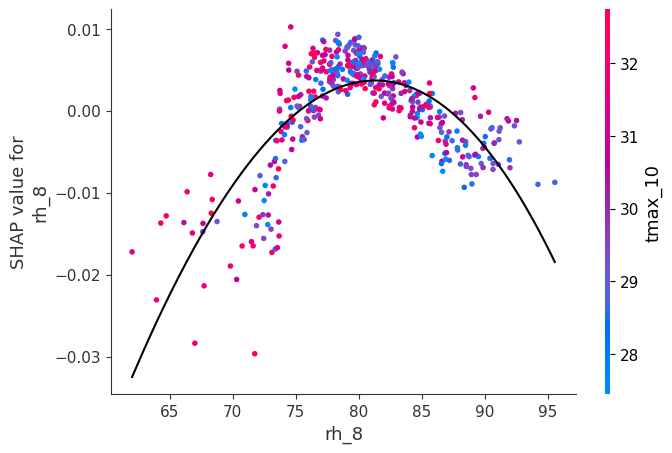

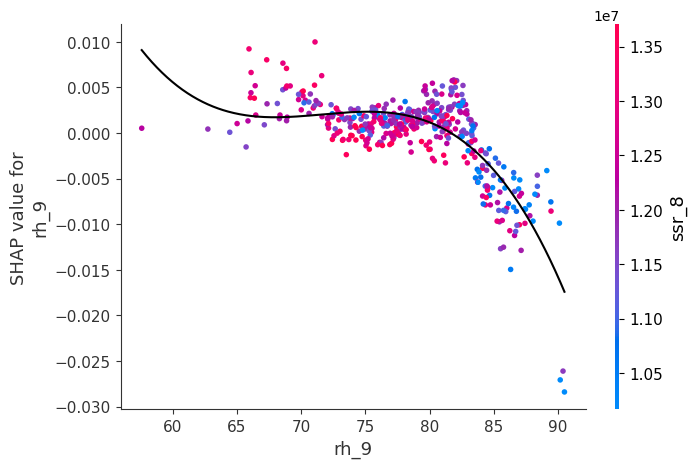

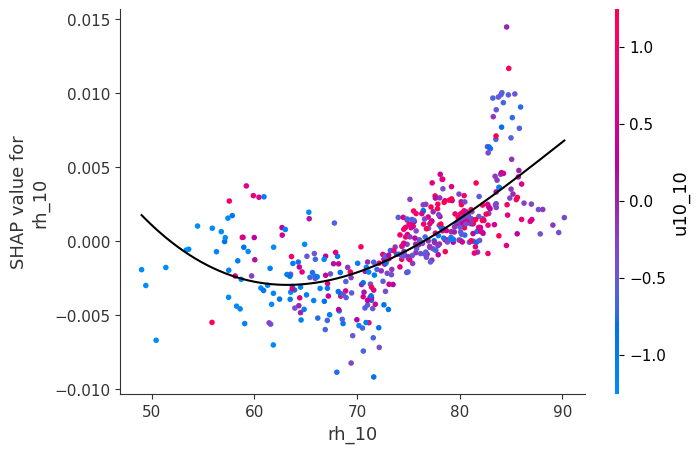

IndexError: index 56 is out of bounds for axis 1 with size 56

In [27]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assuming shap_values and X are defined
# features is assumed to be a list containing the names of the features

for idx in range(100):  # Loop through indexes from 0 to 99
    shap.dependence_plot(idx, shap_values, X, feature_names=features, show=False)
    
    # Extract data for current feature
    if isinstance(X, np.ndarray):
        x_values = X[:, idx]
    else:  # Assuming X is a DataFrame
        x_values = X.iloc[:, idx]
    
    y_values = shap_values[:, idx]
    
    # Calculate best fit curve
    # Change 2 to a higher number for higher-order polynomials
    order = 3
    coef = np.polyfit(x_values, y_values, order)
    poly_fn = np.poly1d(coef)
    
    # Generate x values for plotting the curve
    x_curve = np.linspace(np.min(x_values), np.max(x_values), 500)
    y_curve = poly_fn(x_curve)
    
    # Plot best fit curve
    plt.plot(x_curve, y_curve, color='black')
    plt.show()


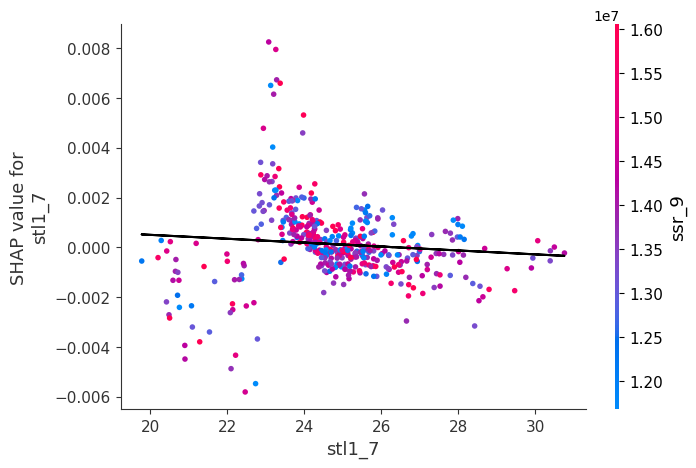

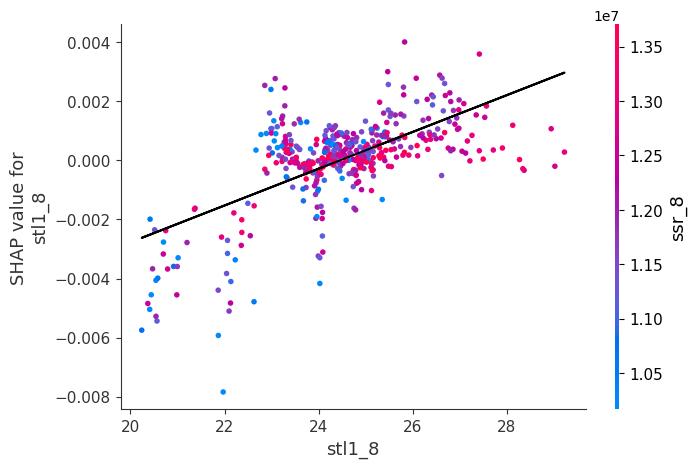

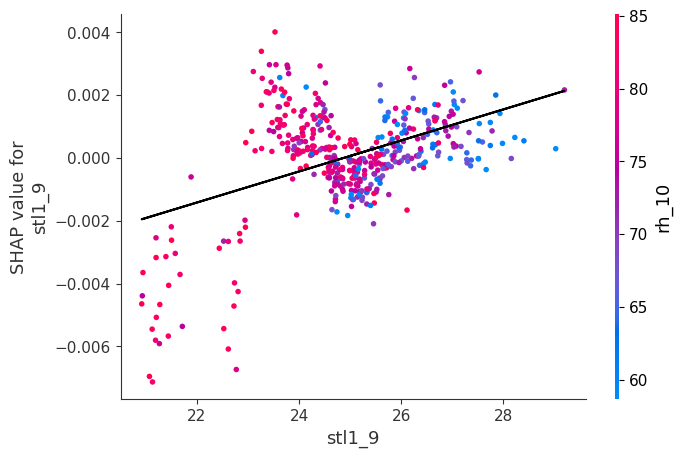

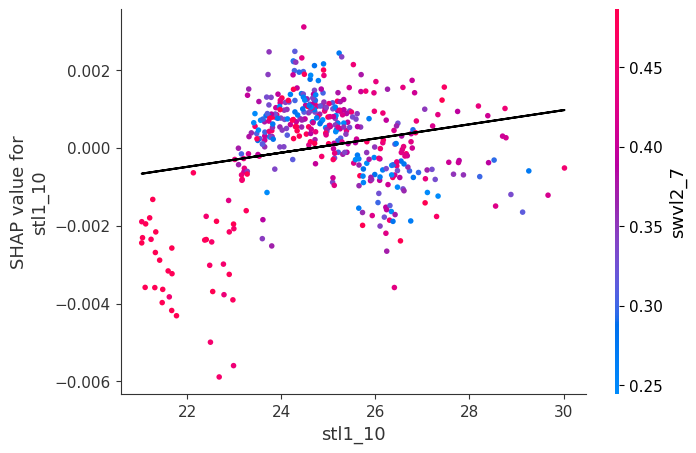

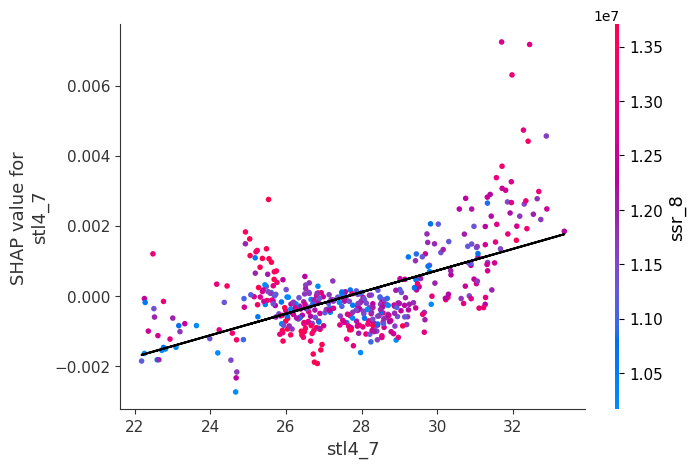

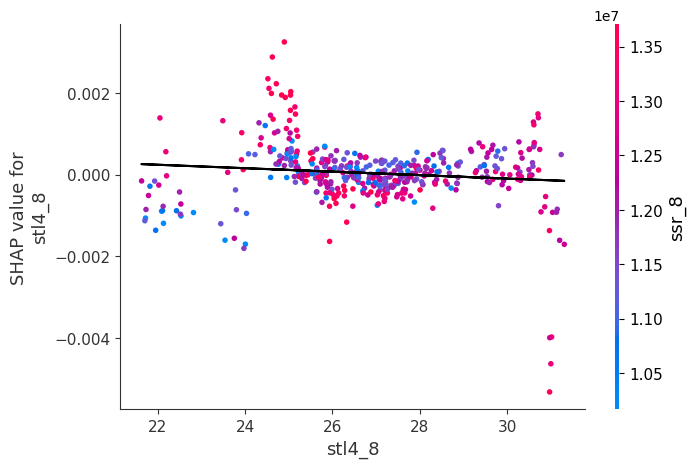

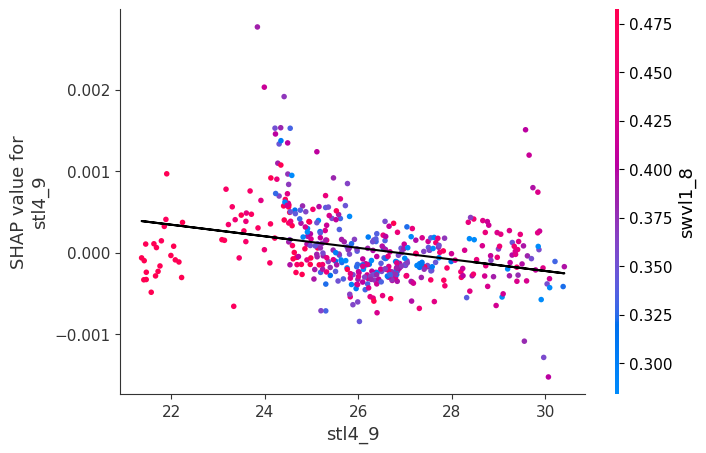

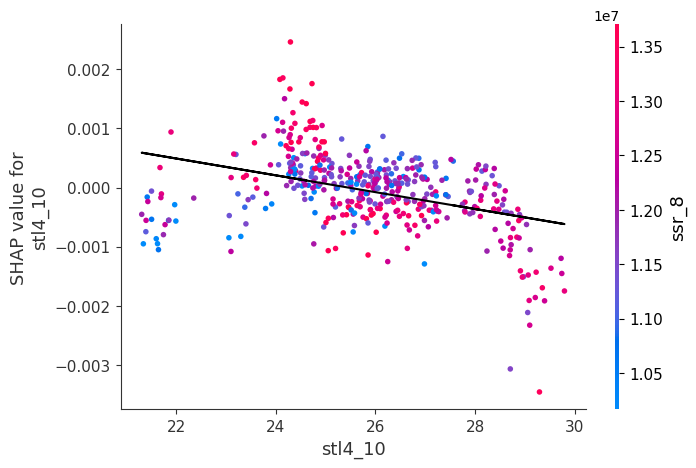

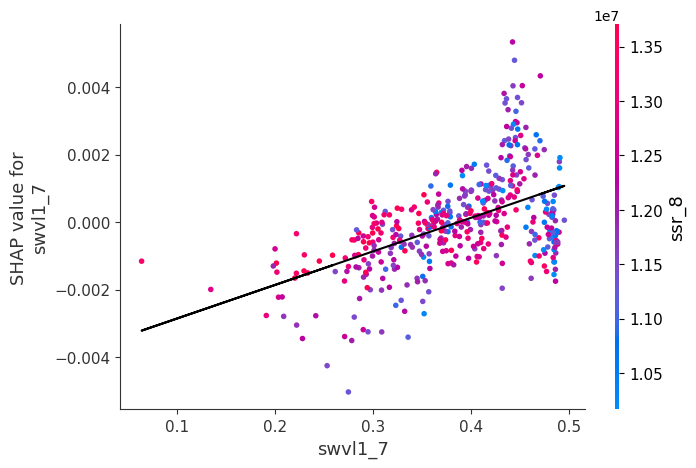

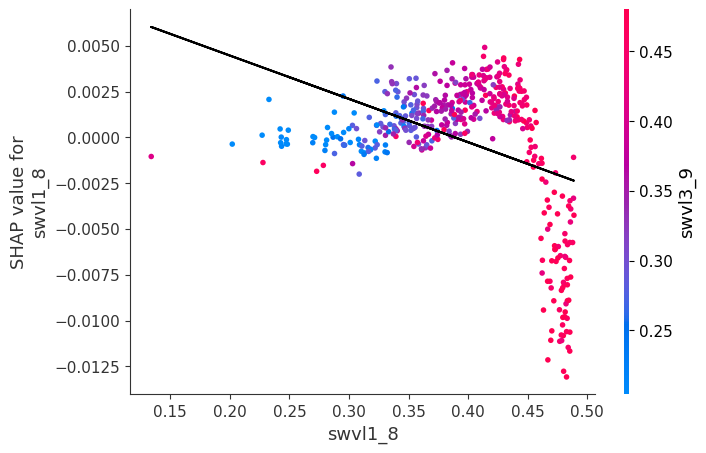

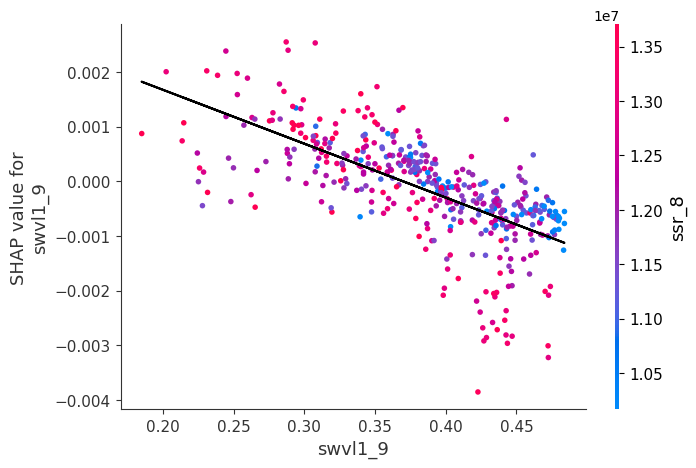

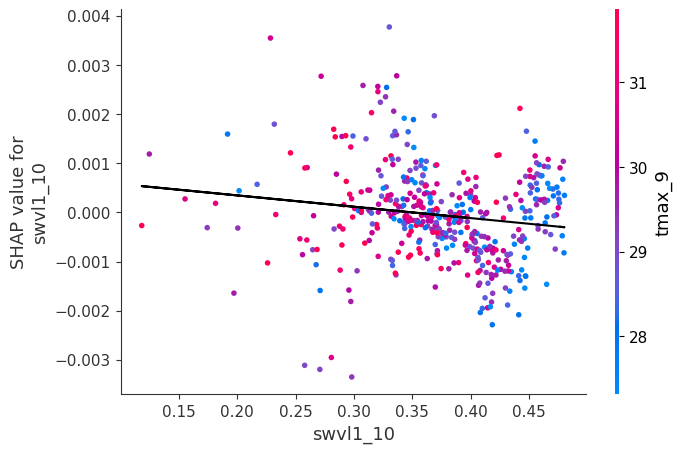

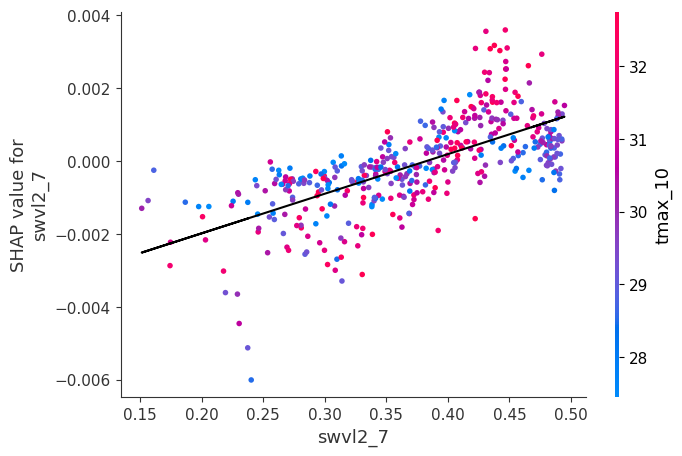

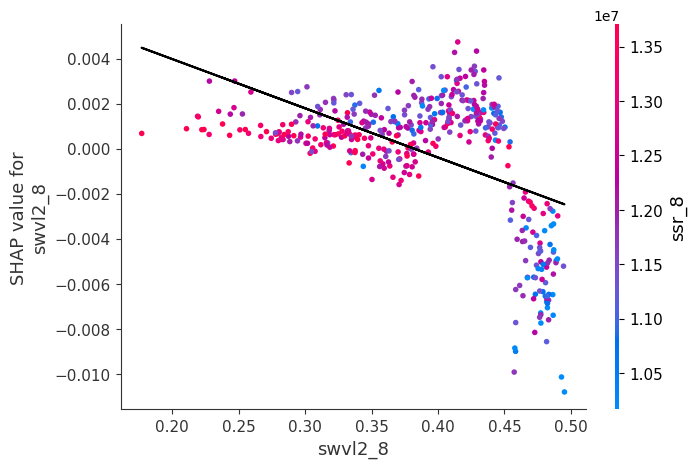

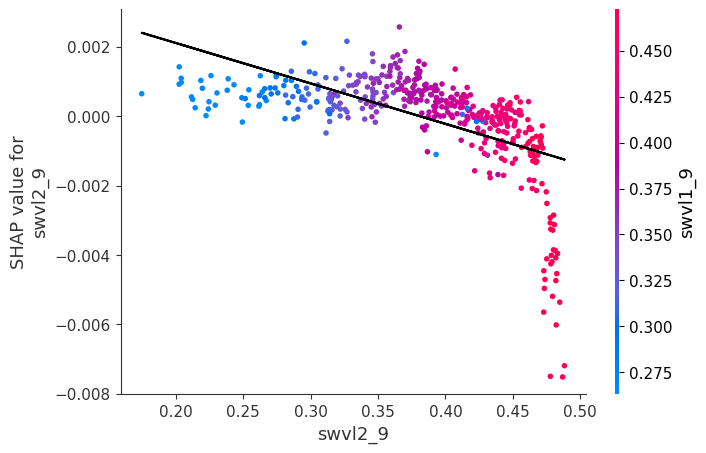

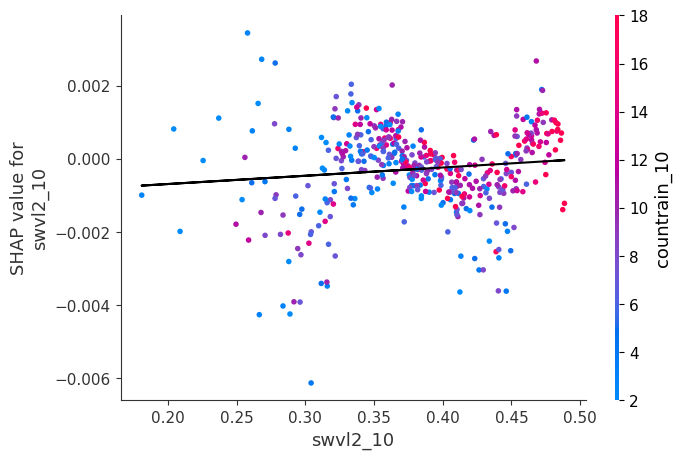

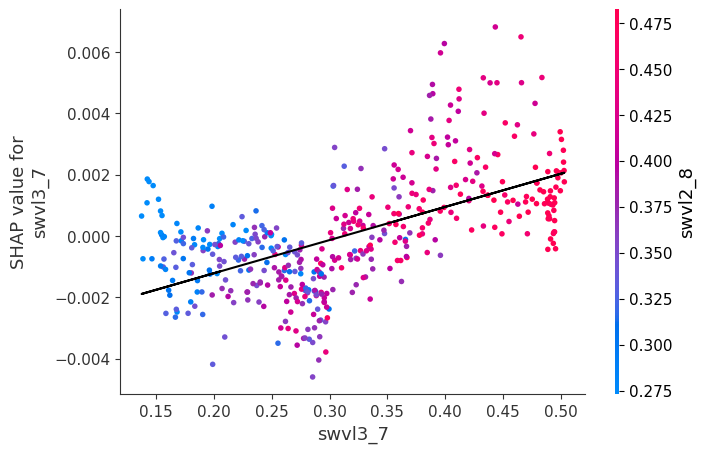

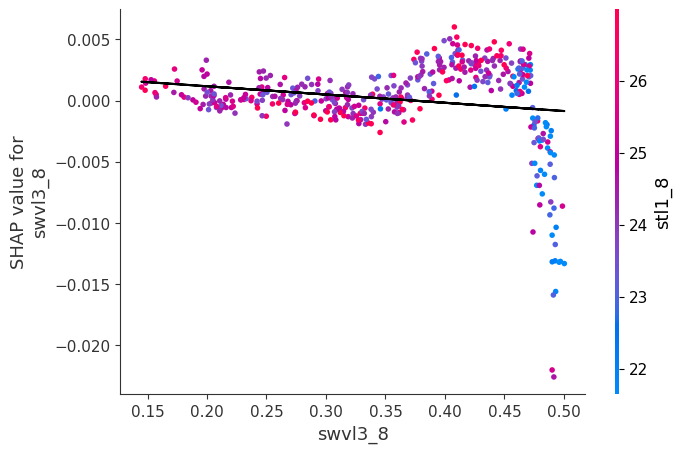

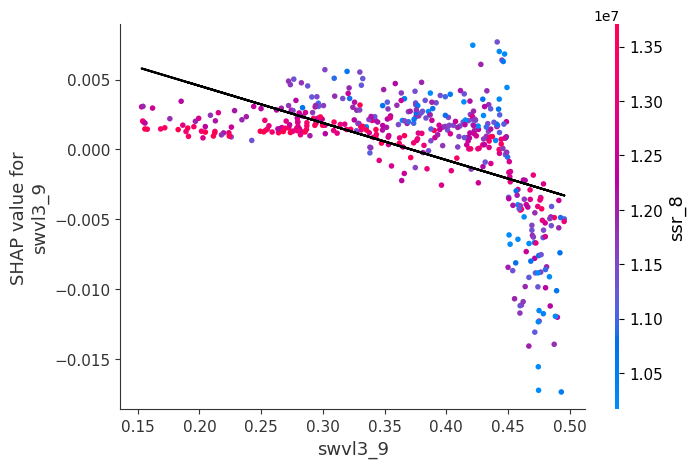

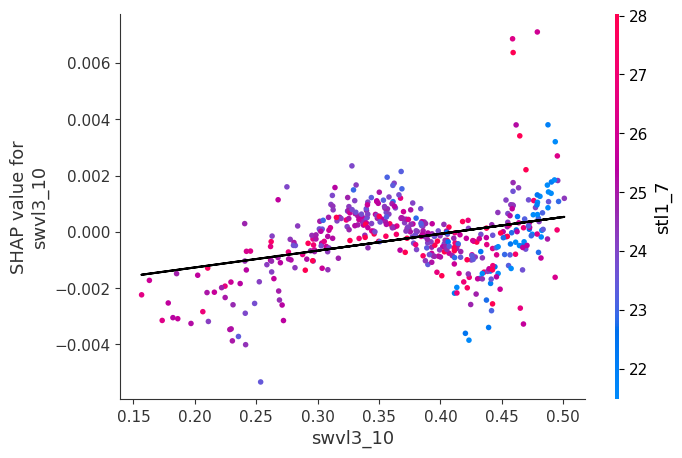

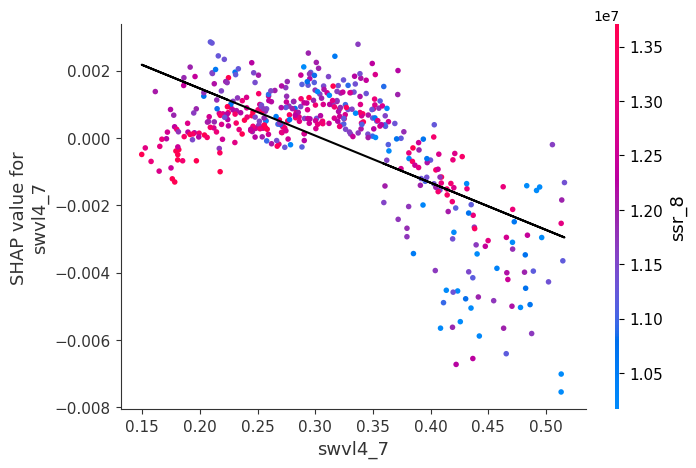

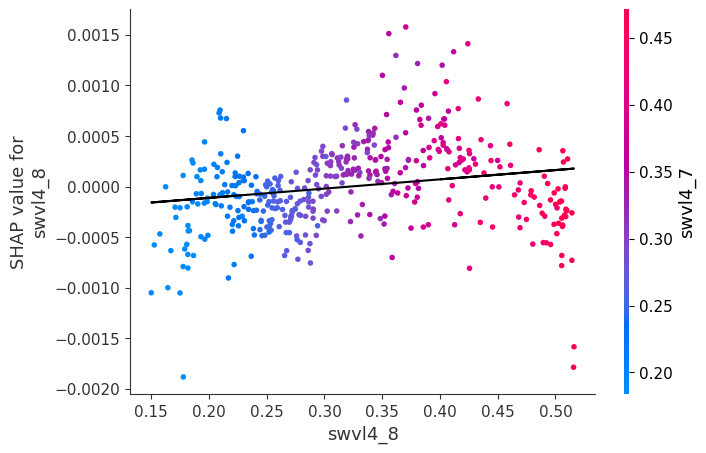

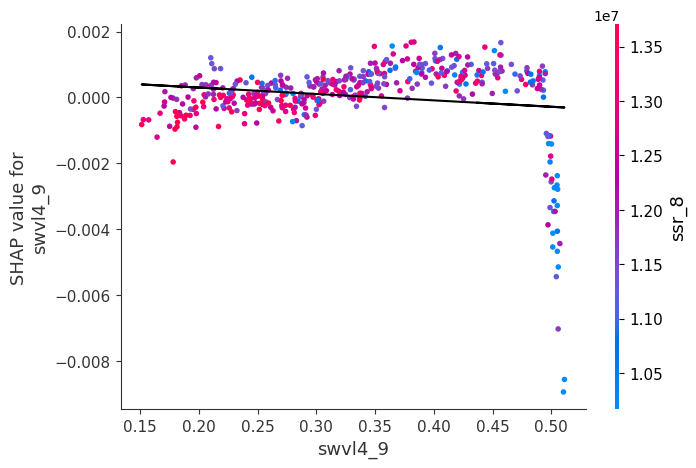

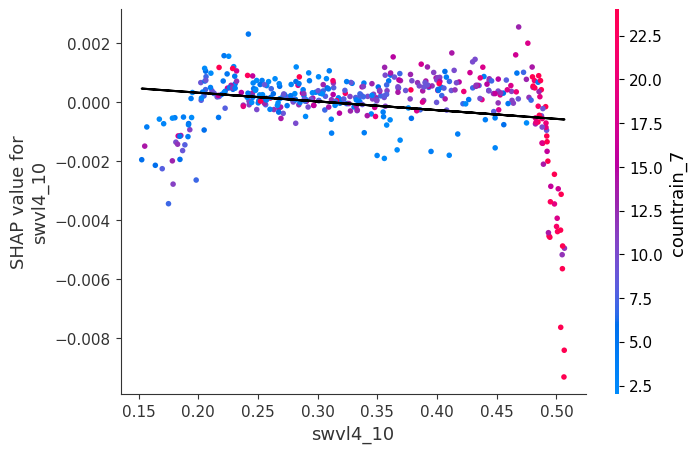

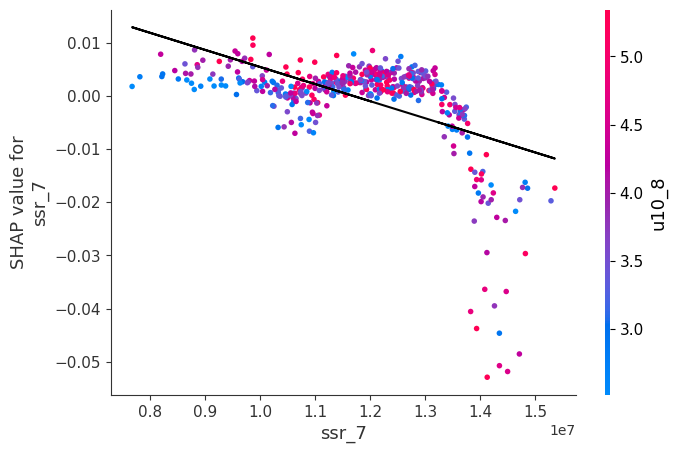

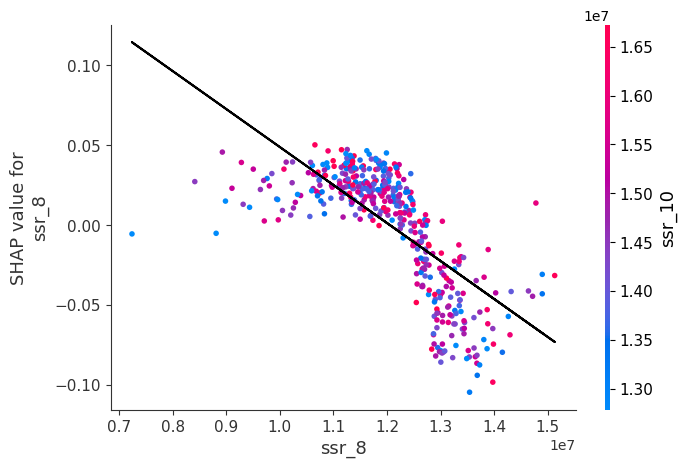

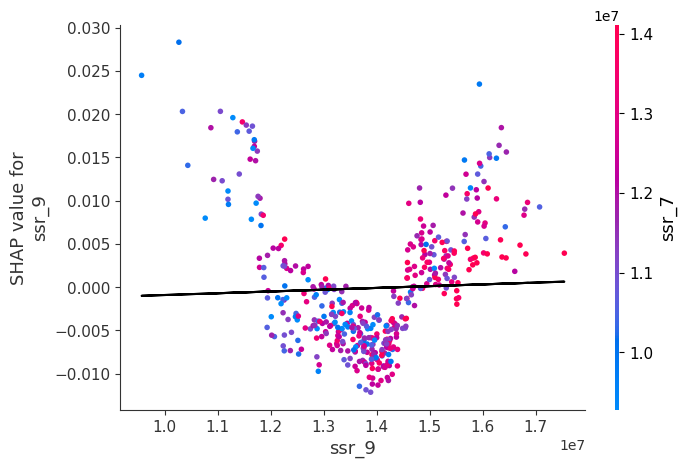

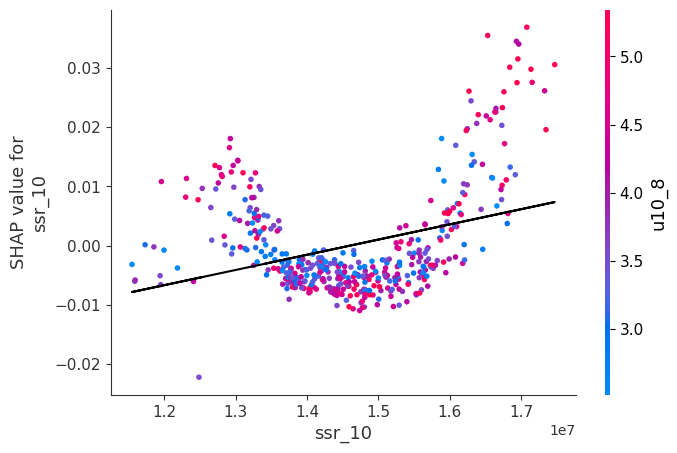

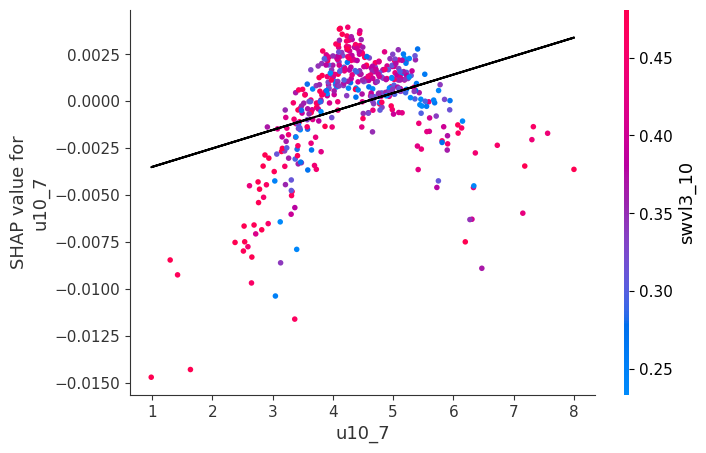

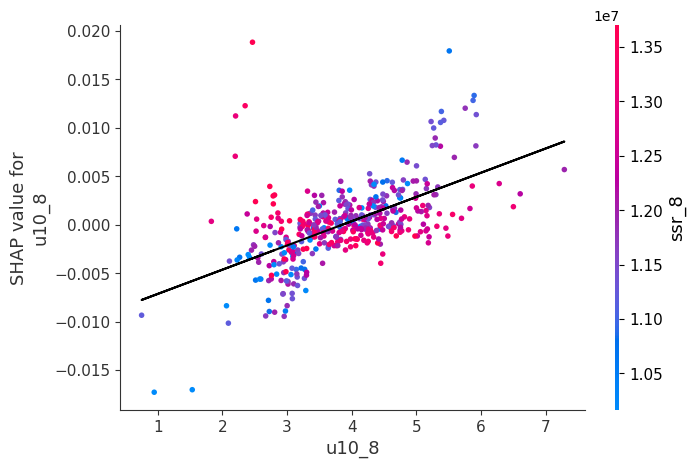

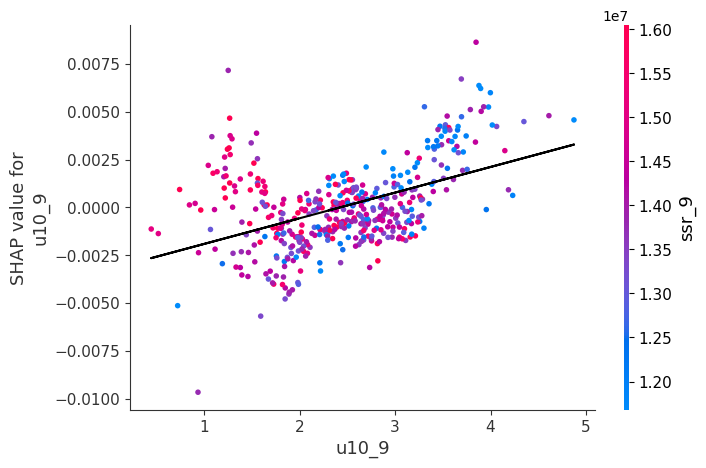

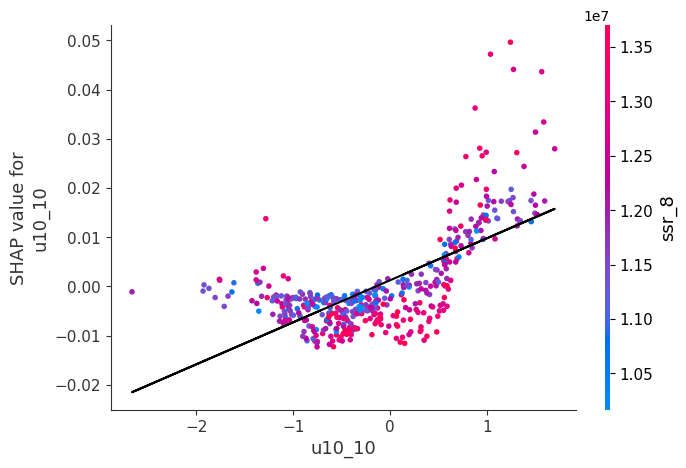

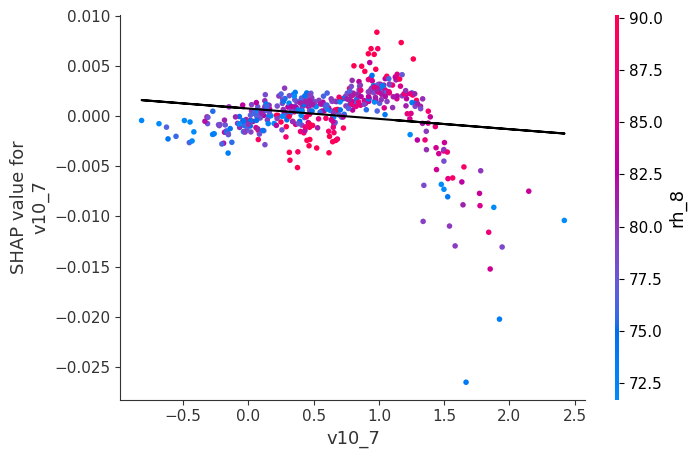

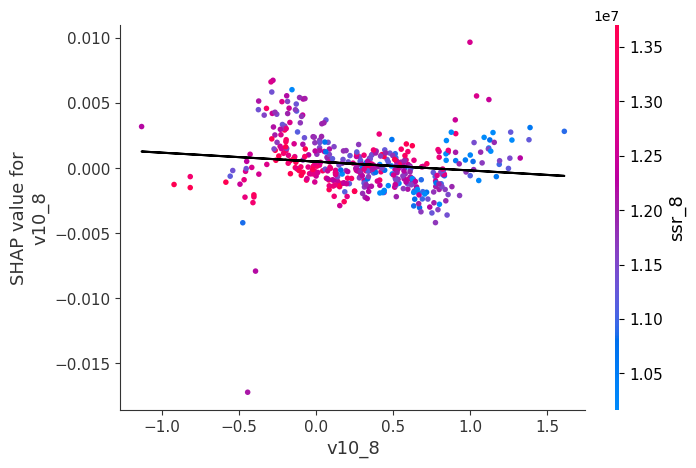

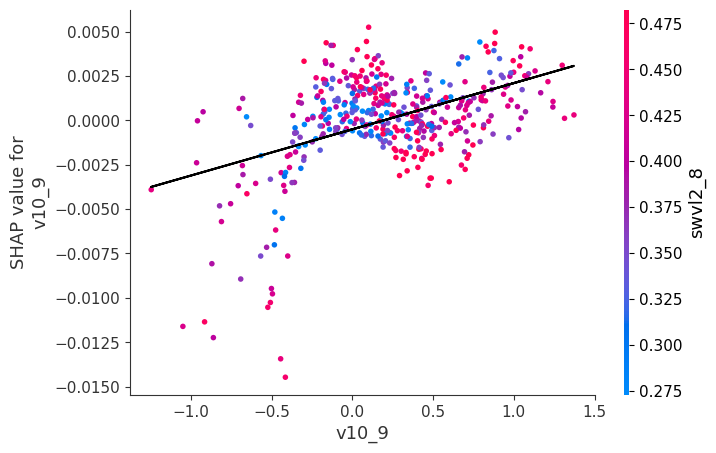

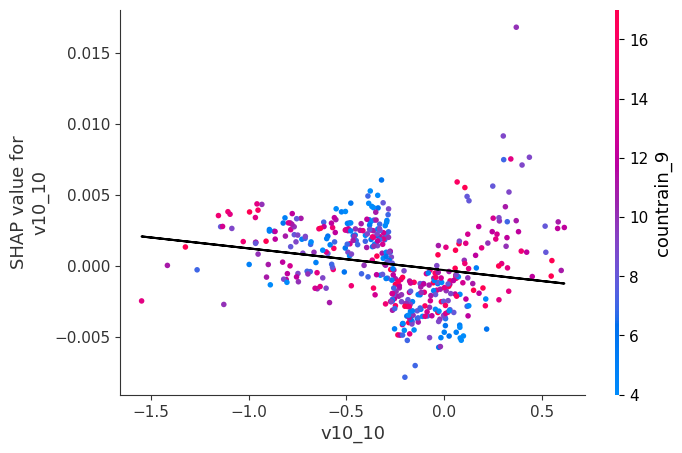

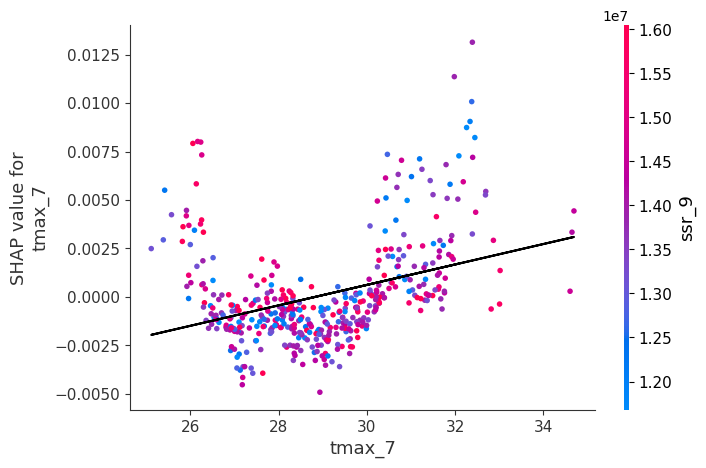

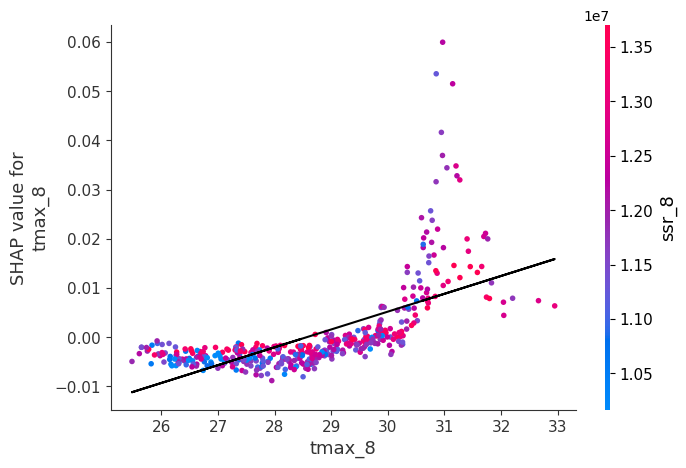

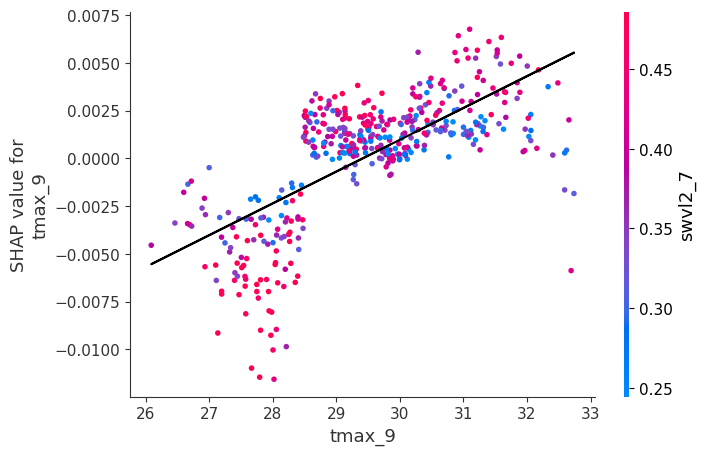

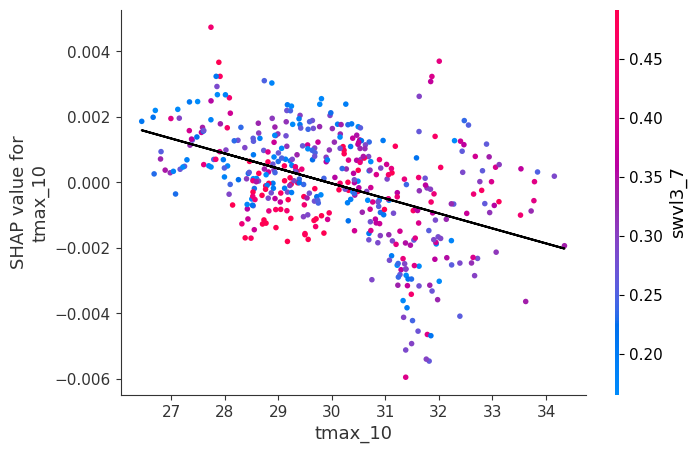

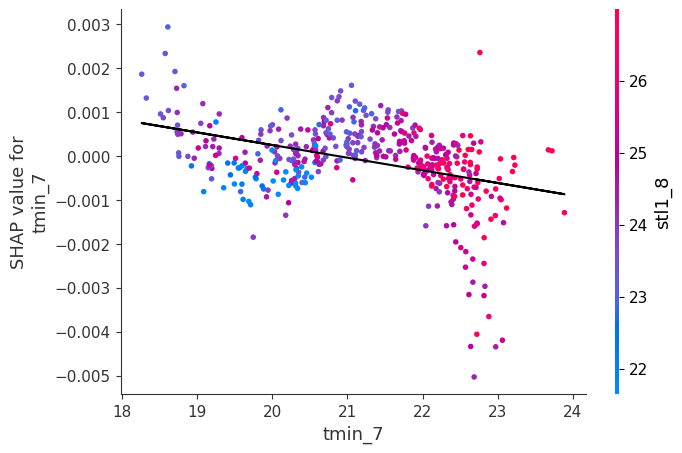

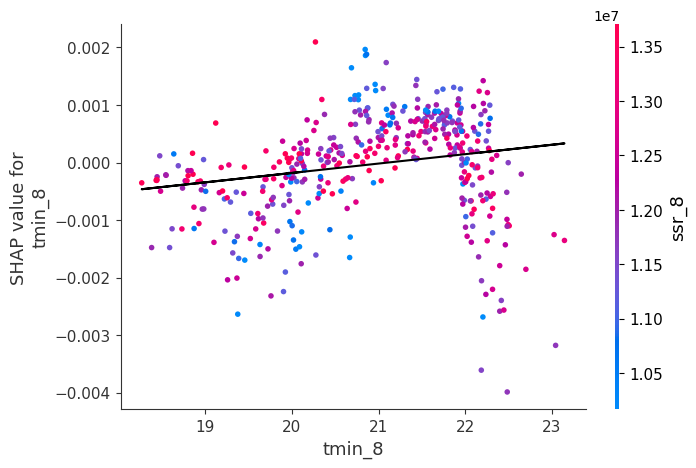

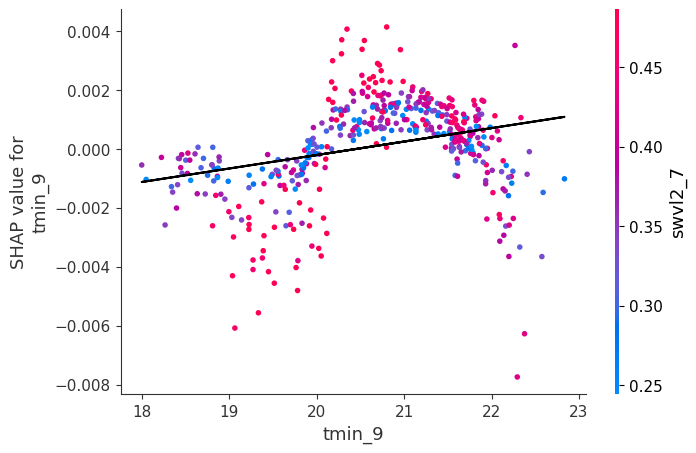

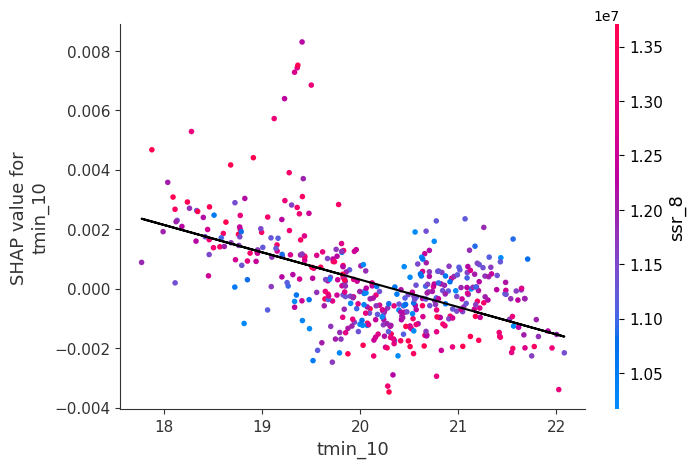

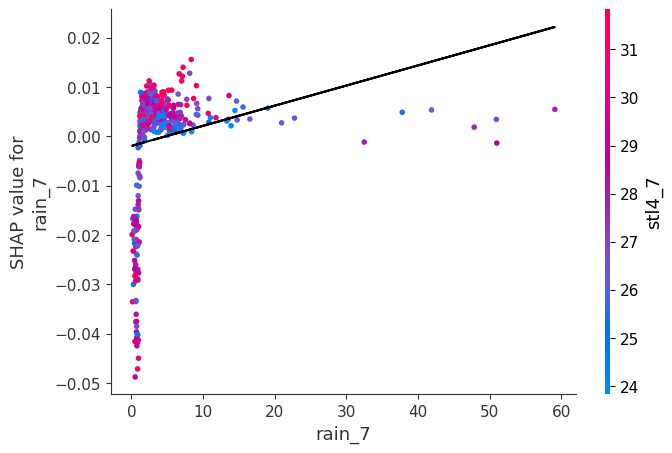

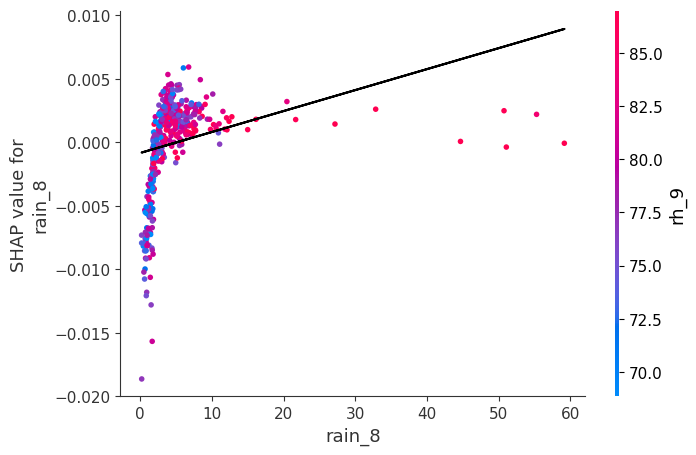

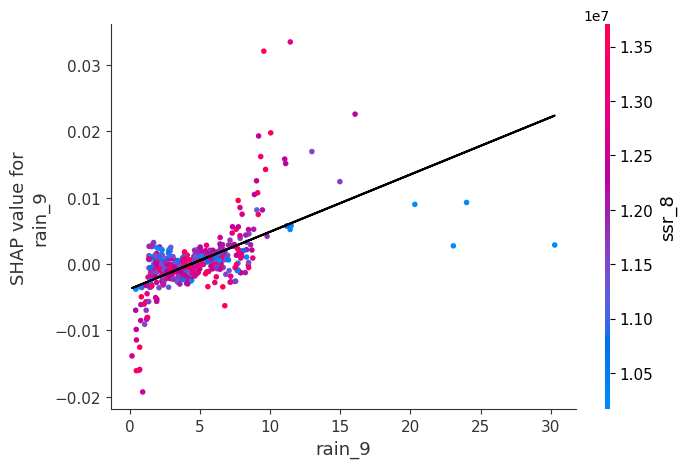

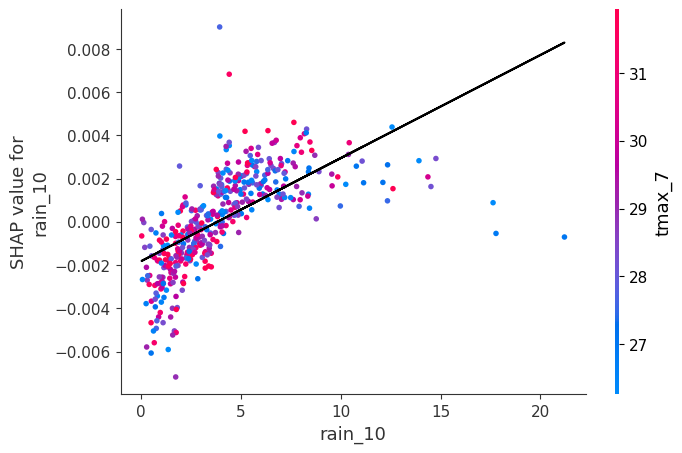

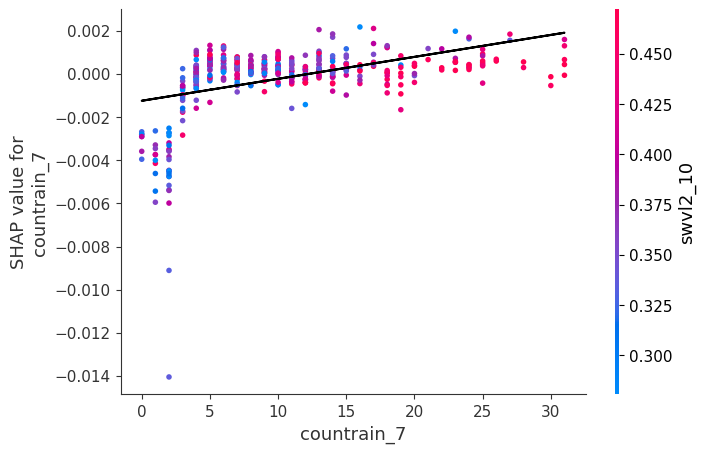

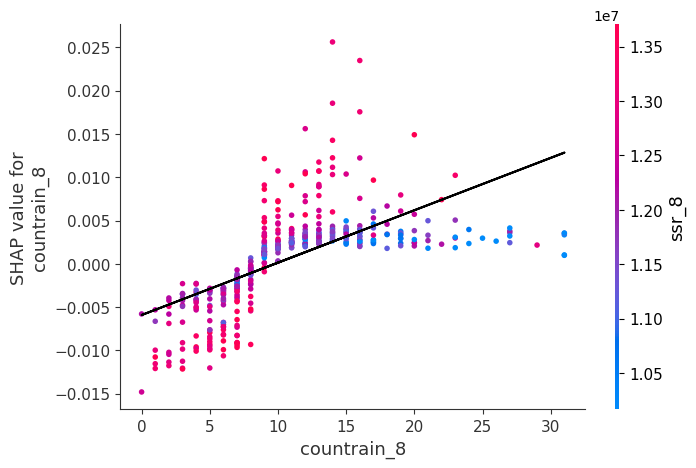

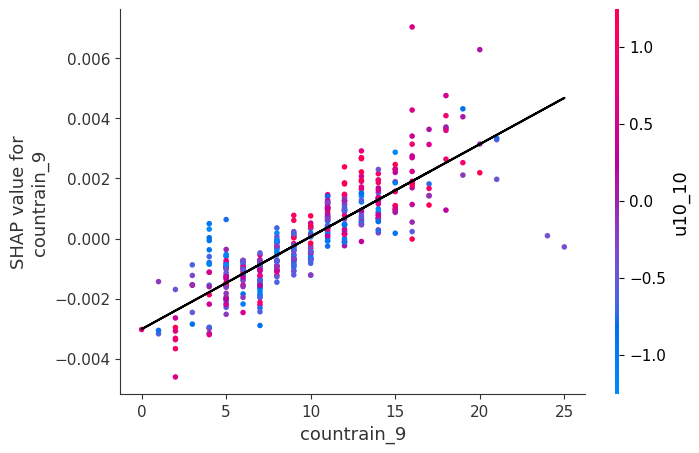

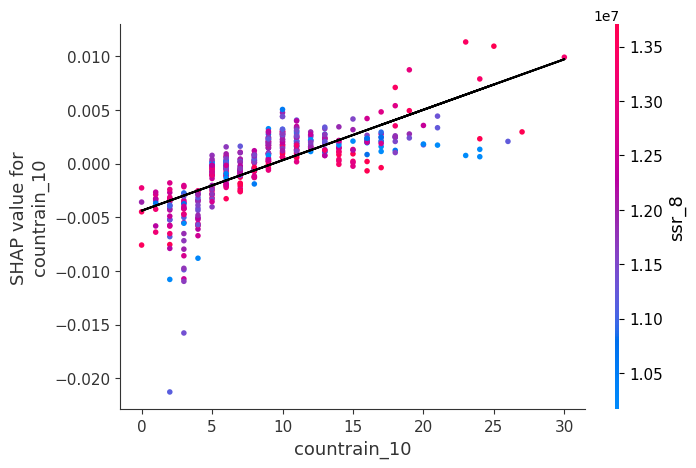

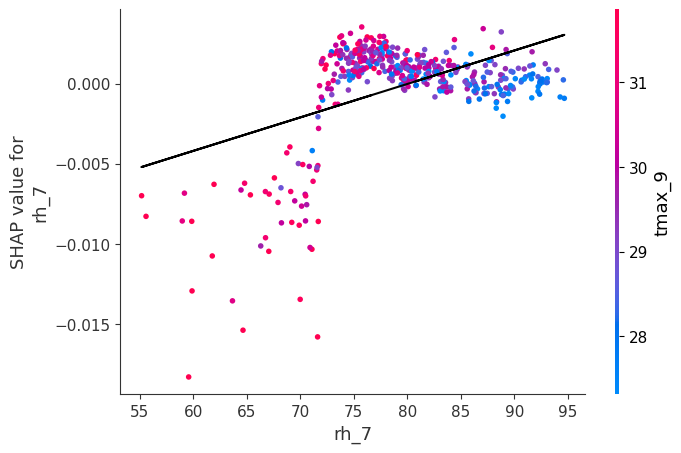

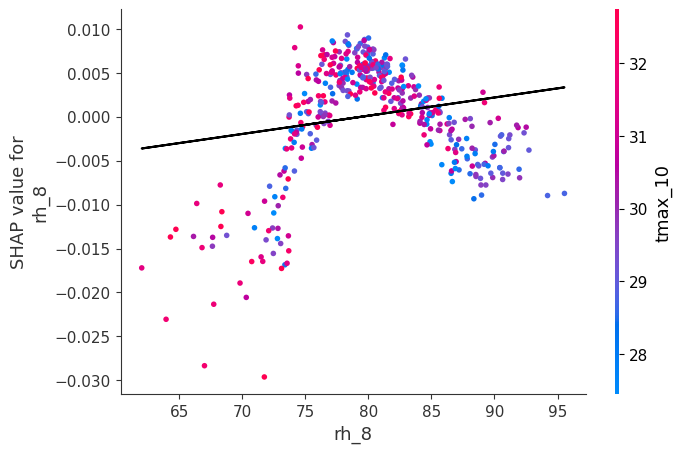

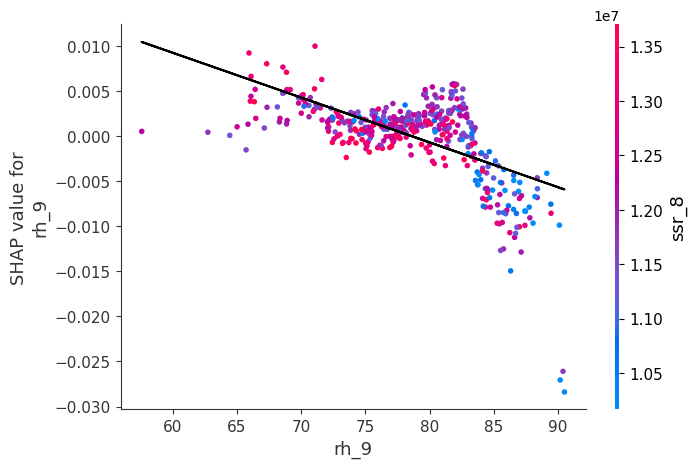

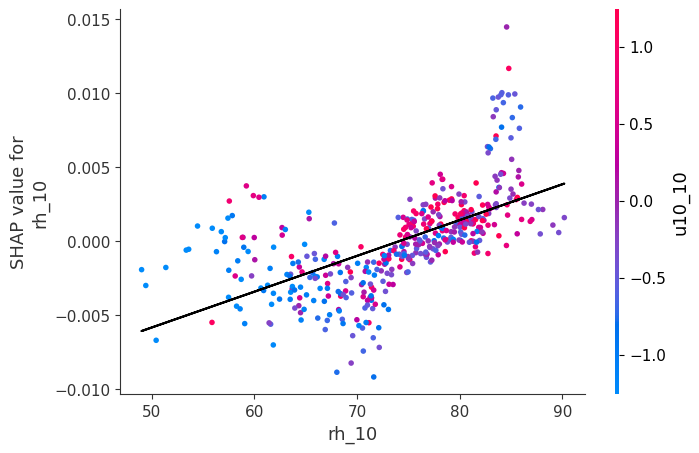

IndexError: index 56 is out of bounds for axis 1 with size 56

In [25]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assuming shap_values and X are defined
# features is assumed to be a list containing the names of the features

for idx in range(100):  # Loop through indexes from 0 to 49
    shap.dependence_plot(idx, shap_values, X, feature_names=features, show=False)
    
    # Extract data for current feature
    if isinstance(X, np.ndarray):
        x_values = X[:, idx]
    else:  # Assuming X is a DataFrame
        x_values = X.iloc[:, idx]
    
    y_values = shap_values[:, idx]
    
    # Calculate best fit line
    coef = np.polyfit(x_values, y_values, 1)
    poly1d_fn = np.poly1d(coef)
    
    # Plot best fit line
    plt.plot(x_values, poly1d_fn(x_values), color='black')
    plt.show()


In [ ]:
X.columns

Index(['stl1_11', 'stl1_12', 'stl1_1', 'stl1_2', 'stl1_3', 'stl1_4', 'stl4_11',
       'stl4_12', 'stl4_1', 'stl4_2', 'stl4_3', 'stl4_4', 'swvl1_11',
       'swvl1_12', 'swvl1_1', 'swvl1_2', 'swvl1_3', 'swvl1_4', 'swvl2_11',
       'swvl2_12', 'swvl2_1', 'swvl2_2', 'swvl2_3', 'swvl2_4', 'swvl3_11',
       'swvl3_12', 'swvl3_1', 'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl4_11',
       'swvl4_12', 'swvl4_1', 'swvl4_2', 'swvl4_3', 'swvl4_4', 'ssr_12',
       'ssr_11', 'ssr_1', 'ssr_2', 'ssr_3', 'ssr_4', 'u10_11', 'u10_12',
       'u10_1', 'u10_2', 'u10_3', 'u10_4', 'v10_11', 'v10_12', 'v10_1',
       'v10_2', 'v10_3', 'v10_4', 'tmax_11', 'tmax_12', 'tmax_1', 'tmax_2',
       'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2', 'tmin_3',
       'tmin_4', 'rain_11', 'rain_12', 'rain_1', 'rain_2', 'rain_3', 'rain_4',
       'countrain_11', 'countrain_12', 'countrain_1', 'countrain_2',
       'countrain_3', 'countrain_4', 'rh_11', 'rh_12', 'rh_1', 'rh_2', 'rh_3',
       'rh_4'],
      dty

In [ ]:
stop

NameError: name 'stop' is not defined

In [ ]:
expected_value = explainer.expected_value

In [ ]:
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

In [ ]:
select = range(50)
features = X.iloc[select]

In [ ]:
shap.decision_plot(expected_value, shap_values, features)

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(features))

In [ ]:
from IPython.display import display

In [ ]:
explanation = explainer(X)

In [ ]:
# shap.initjs()
# shap.plots.force(explanation[0:500], plot_cmap="DrDb")

In [ ]:
# visualize the first 5 predictions explanations with a dark red dark blue color map.
shap.force_plot(explainer.expected_value, shap_values[0:1,:], X_test[0:1,:], plot_cmap="DrDb", feature_names=features)

In [ ]:
stop

In [ ]:
shap.summary_plot(shap_values, X, max_display=50)

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import seaborn as sns


# Set Seaborn style
sns.set_style("whitegrid")

features = list(range(50))
display = PartialDependenceDisplay.from_estimator(model, X, features)

plt.gcf().set_size_inches(100, 500)  # Adjust the size as needed
plt.show()

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [ ]:
np.shape(shap_values.values)

In [ ]:
# shap.plots.waterfall(shap_values[0])

In [ ]:
# shap.initjs()
# shap.plots.force(shap_values)

In [ ]:
shap.plots.bar(shap_values, max_display=50)

In [ ]:
shap.plots.violin(shap_values, features=X,plot_type = 'layered_violin', max_display=50)

In [ ]:
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

In [ ]:
stop

In [ ]:
a = df['swvl1']
b = df['Yield(Tonnes/Hectare)']
slope, intercept = np.polyfit(a,b, 1)

# Calculate the best-fit line
best_fit_line = slope * a + intercept

# Plot the scatter plot and the best-fit line
plt.scatter(a, b, label='Data points')
plt.plot(a, best_fit_line, color='red', label='Best-fit line')
plt.xlabel('swvl1')
plt.ylabel('Yield(Tonnes/Hectare)')
plt.title('Scatter Plot with Best-fit Line')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

In [ ]:
shap.dependence_plot("rh_3", shap_values, X)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)